In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from yellowbrick.classifier import ROCAUC
from matplotlib.backends.backend_pdf import PdfPages as MatplotlibPdfPages
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import os

In [4]:
ds_dir = "Kannada_MNIST"

X_train = np.load(os.path.join(ds_dir,'/content/X_kannada_MNIST_train.npz'))['arr_0']
X_test = np.load(os.path.join(ds_dir,'/content/X_kannada_MNIST_test.npz'))['arr_0']
y_train = np.load(os.path.join(ds_dir,'/content/y_kannada_MNIST_train.npz'))['arr_0']
y_test = np.load(os.path.join(ds_dir,'/content/y_kannada_MNIST_test.npz'))['arr_0']


print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


52115


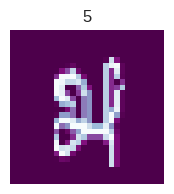

In [5]:
def plot_random_digit():
    random_index = np.random.randint(0,X_train.shape[0])
    print(random_index)
    plt.imshow(X_train[random_index], cmap='BuPu_r')
    plt.title(y_train[random_index])
    plt.axis("Off")

plt.figure(figsize=[2,2])
plot_random_digit()

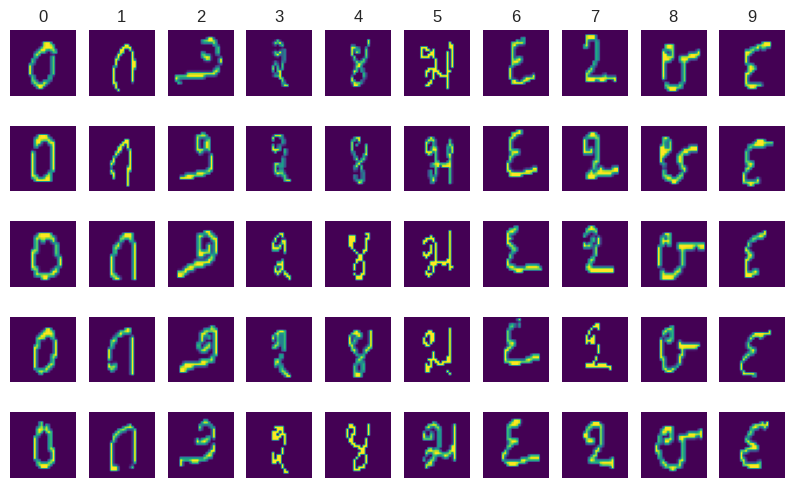

In [6]:
plt.figure(figsize=[10, 6])  # Set figure size to accommodate 10 rows
for i in range(50):
    plt.subplot(5, 10, i+1)  # Adjust to have 10 rows
    plt.axis('Off')
    if i < 10:
        plt.title(y_train[i])
    plt.imshow(X_train[i], cmap='viridis')

In [7]:
#  converting  two-dimensional array ( 28x28 pixel image) into a one-dimensional array (a vector).
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [8]:
# Perform PCA to 10 components
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_flattened)
X_test_pca = pca.transform(X_test_flattened)

In [9]:
# Decision Trees
model = DecisionTreeClassifier()
model.fit(X_train_pca,y_train)
y_predicted = model.predict(X_test_pca)

y_predicted

array([0, 1, 2, ..., 7, 4, 9], dtype=uint8)

In [10]:
# Random forest
model = RandomForestClassifier()
model.fit(X_train_pca,y_train)
y_predicted=model.predict(X_test_pca)
y_predicted

array([0, 0, 2, ..., 7, 8, 9], dtype=uint8)

In [11]:
# Naive Bayes Model
model = GaussianNB()
model.fit(X_train_pca,y_train)
y_predicted=model.predict(X_test_pca)
y_predicted

array([0, 1, 2, ..., 3, 8, 9], dtype=uint8)

In [13]:
# K-NN Classifier

model = KNeighborsClassifier()
model.fit(X_train_pca,y_train)
y_predicted=model.predict(X_test_pca)
y_predicted

array([0, 1, 2, ..., 7, 8, 9], dtype=uint8)

In [14]:
# SVM
model=SVC()
model.fit(X_train_pca,y_train)
y_predicted=model.predict(X_test_pca)
y_predicted

array([0, 1, 2, ..., 7, 8, 9], dtype=uint8)

            Model  Precision  Recall  F1-Score
0  Decision Trees   0.799348  0.7988  0.798105
1   Random Forest   0.876339  0.8737  0.873027
2     Naive Bayes   0.779320  0.7723  0.770911
3             KNN   0.883000  0.8797  0.878647
4             SVM   0.890594  0.8871  0.886564


<ipython-input-16-fee347115163>:75: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 8))


            Model  Precision  Recall  F1-Score
0  Decision Trees   0.804817  0.8053  0.804351
1   Random Forest   0.897838  0.8945  0.893992
2     Naive Bayes   0.787108  0.7837  0.782154
3             KNN   0.912643  0.9090  0.908374
4             SVM   0.916681  0.9143  0.913816
            Model  Precision  Recall  F1-Score
0  Decision Trees   0.805017  0.8056  0.804579
1   Random Forest   0.907528  0.9043  0.903776
2     Naive Bayes   0.799207  0.7960  0.794645
3             KNN   0.925902  0.9222  0.921995
4             SVM   0.934000  0.9318  0.931429
            Model  Precision  Recall  F1-Score
0  Decision Trees   0.803350  0.8034  0.802468
1   Random Forest   0.905891  0.9028  0.902226
2     Naive Bayes   0.809161  0.8057  0.804430
3             KNN   0.932505  0.9289  0.928663
4             SVM   0.938694  0.9370  0.936727
            Model  Precision  Recall  F1-Score
0  Decision Trees   0.803485  0.8040  0.802887
1   Random Forest   0.907431  0.9045  0.903928
2     Naive B

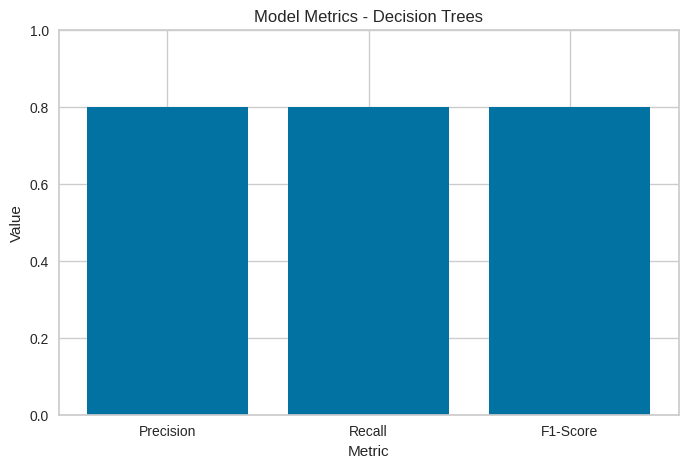

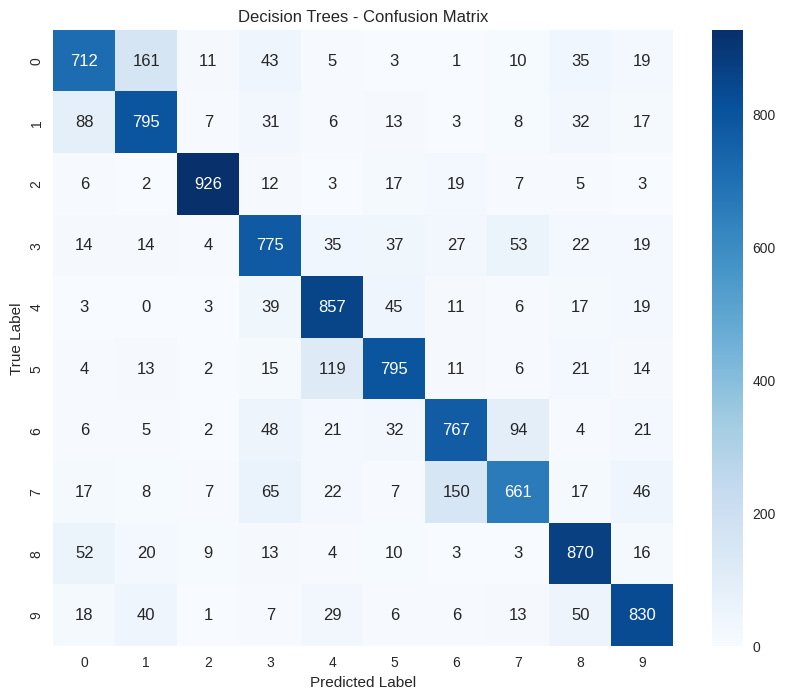

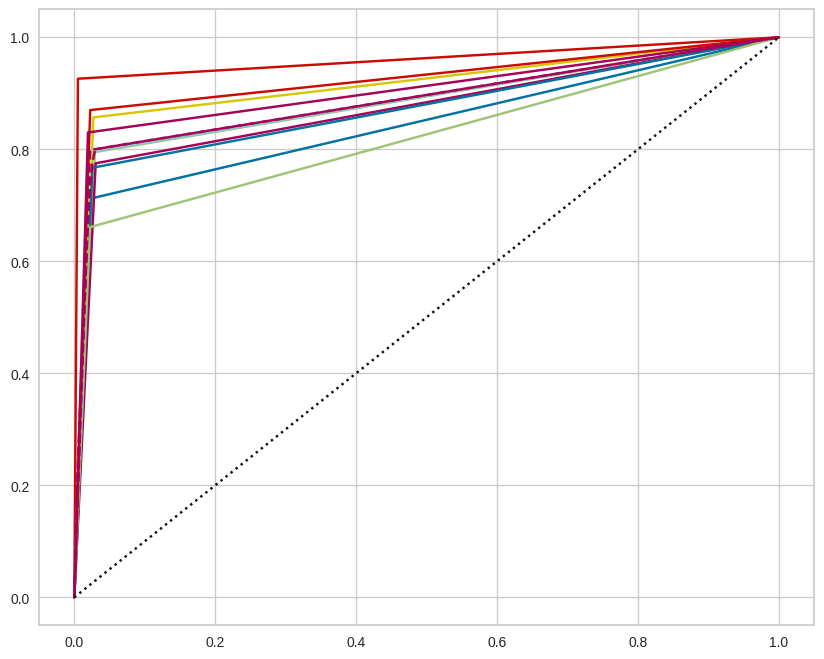

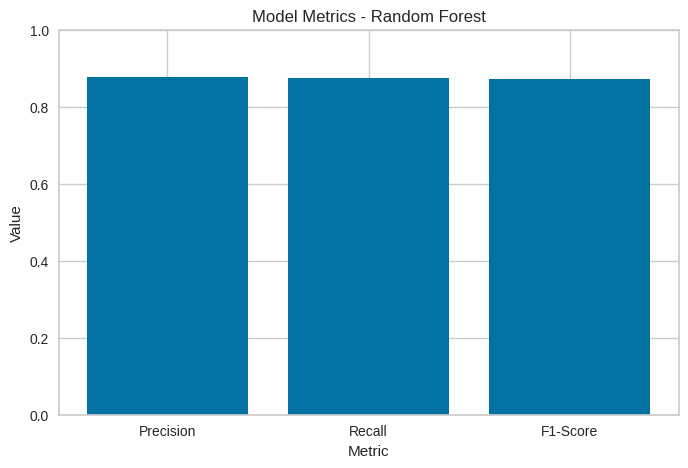

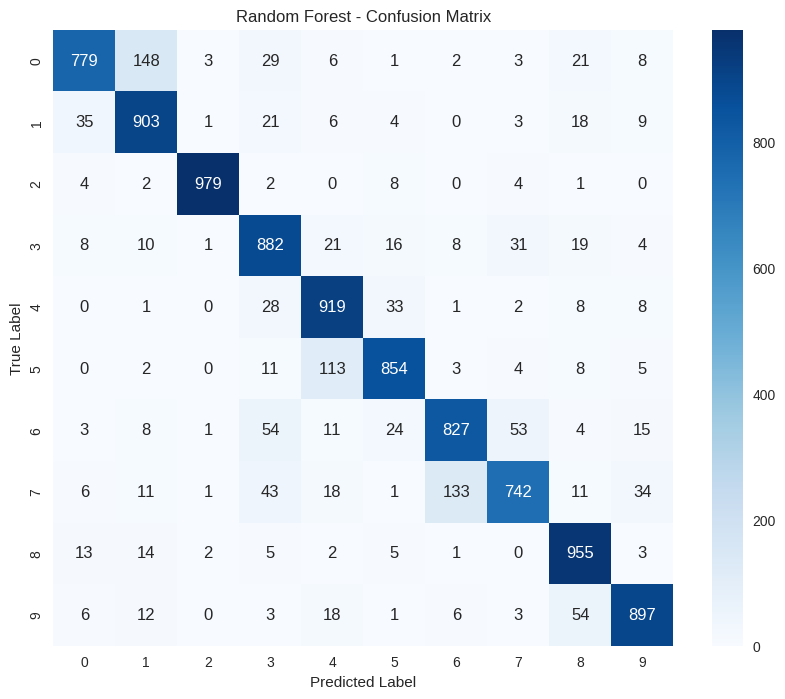

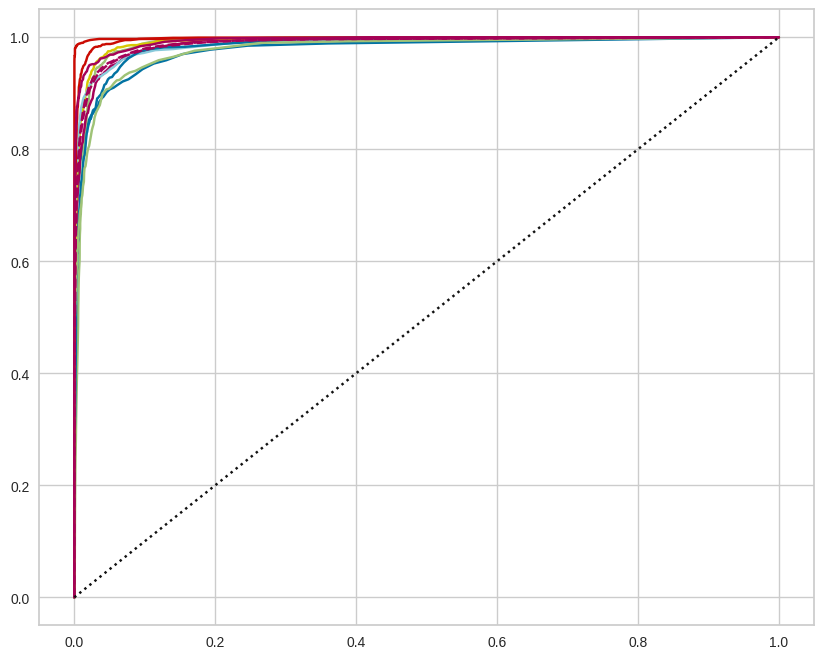

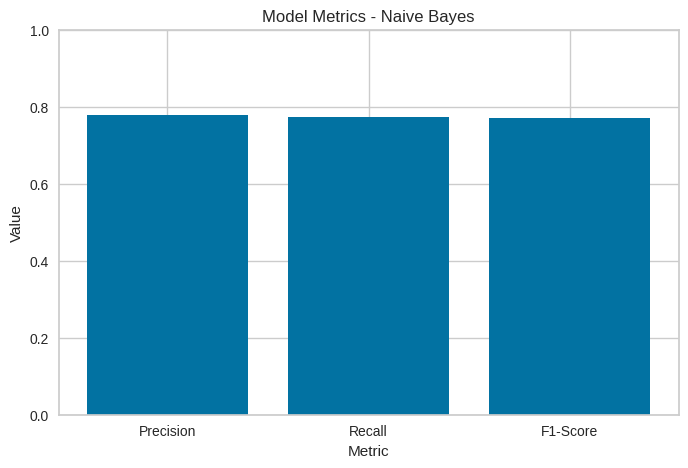

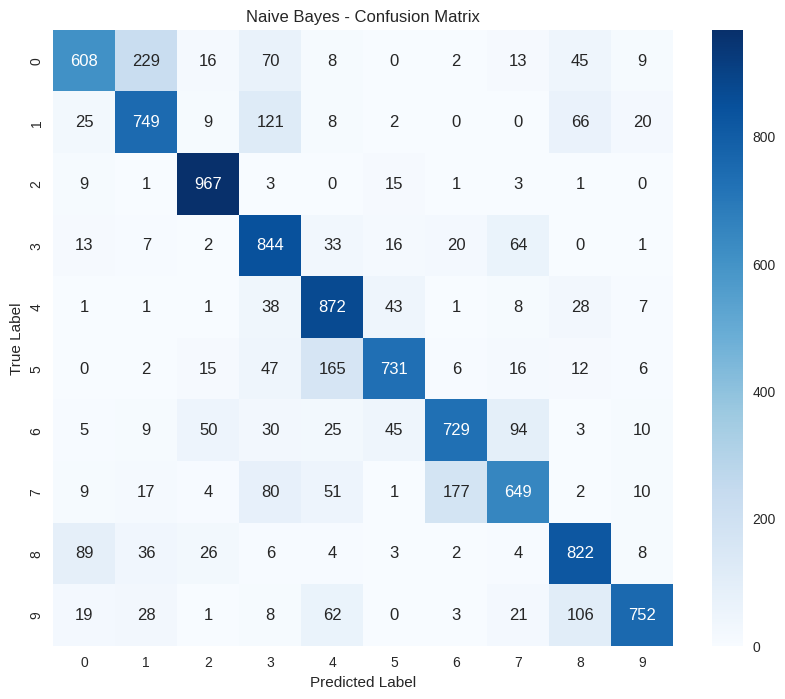

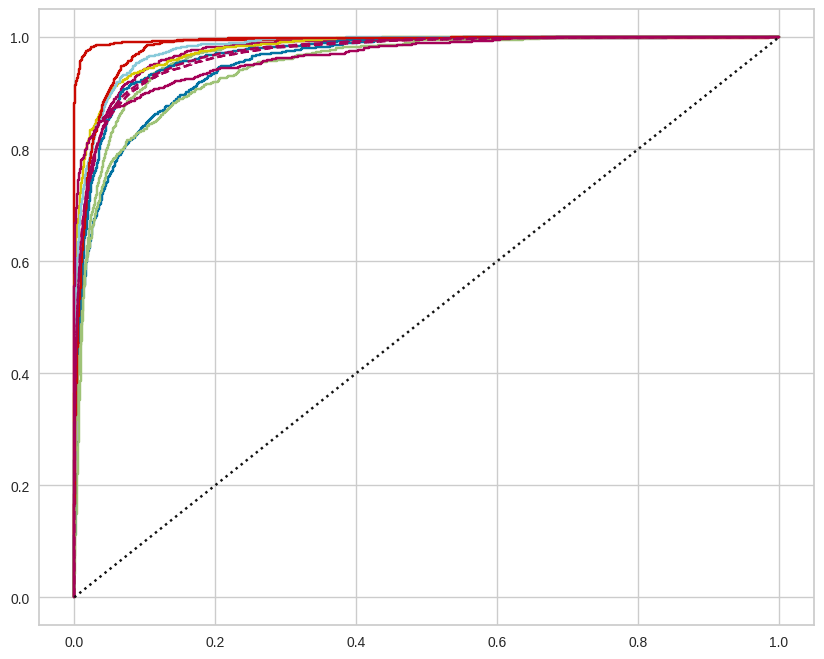

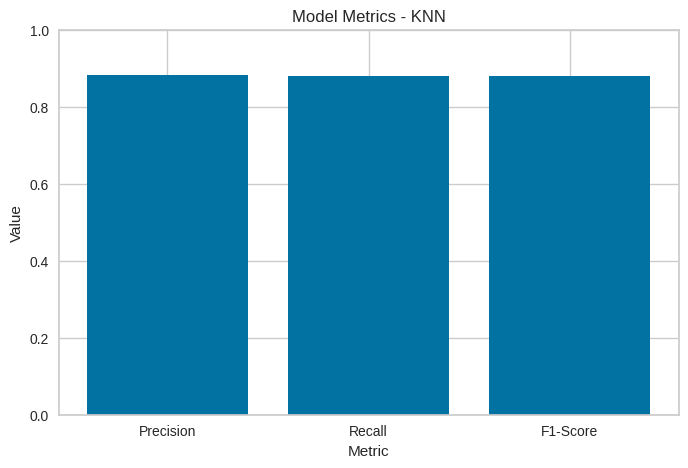

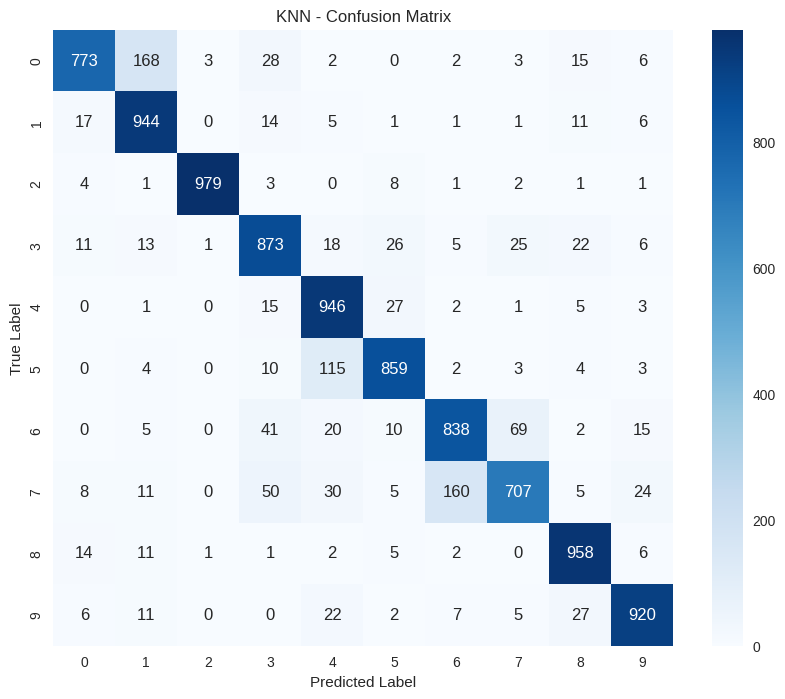

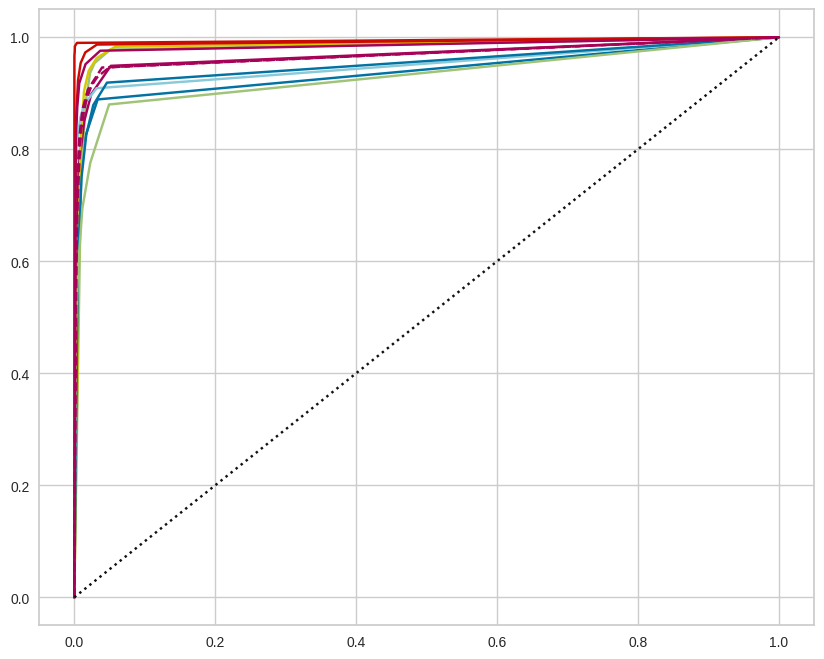

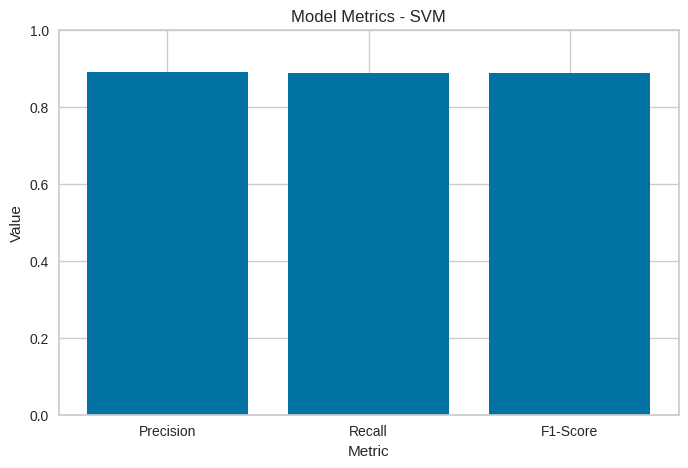

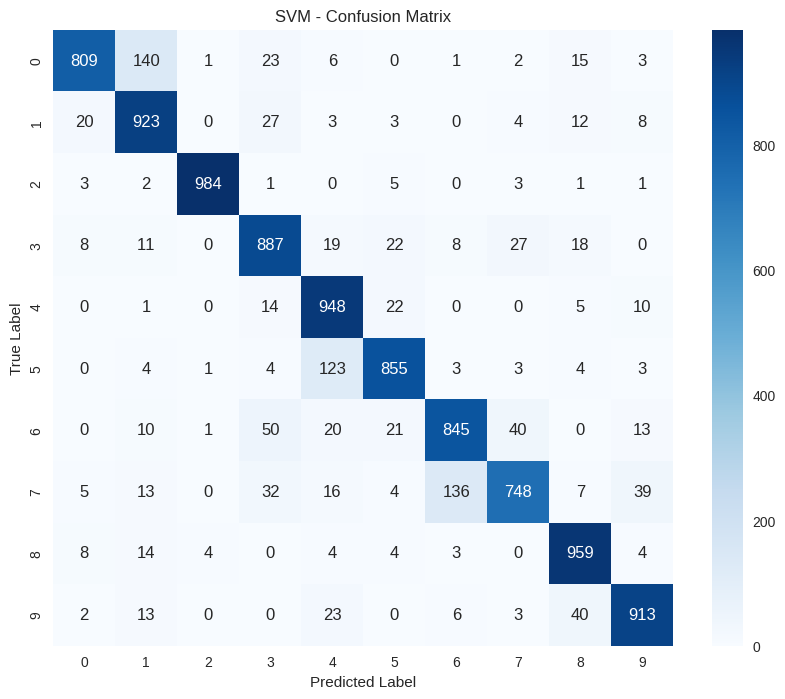

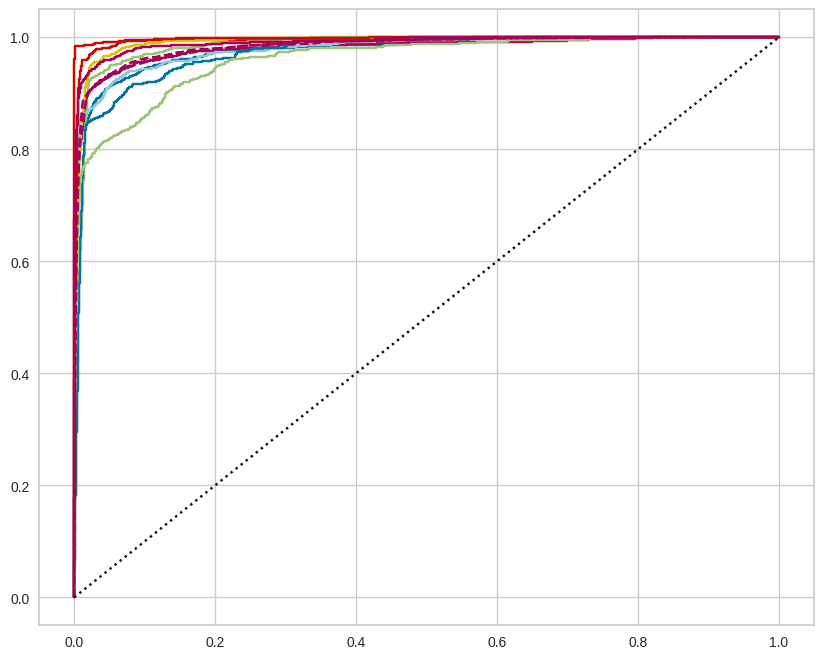

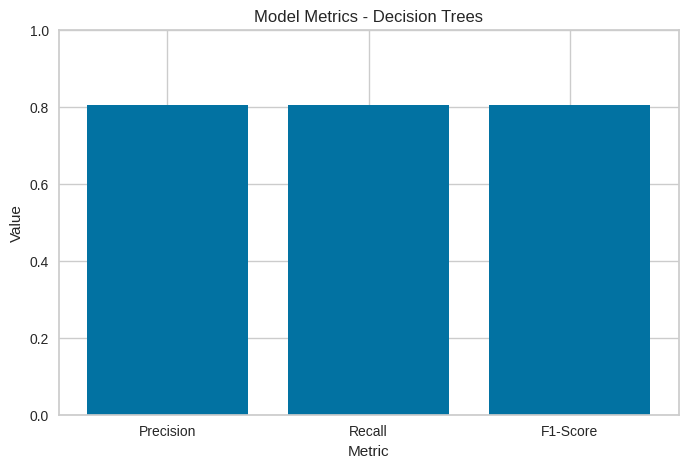

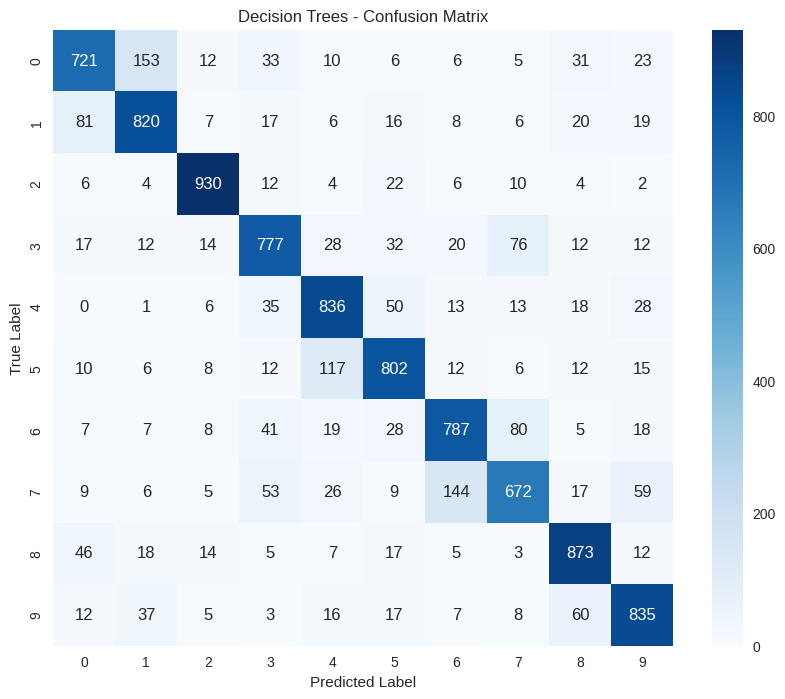

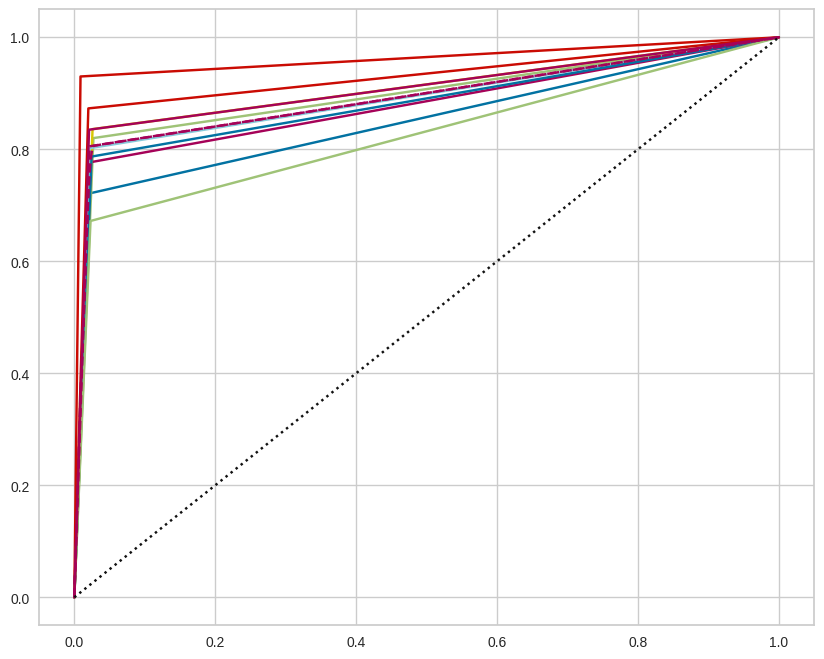

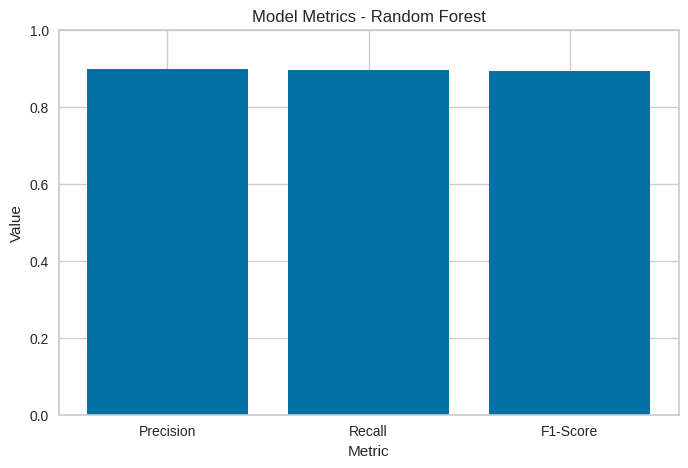

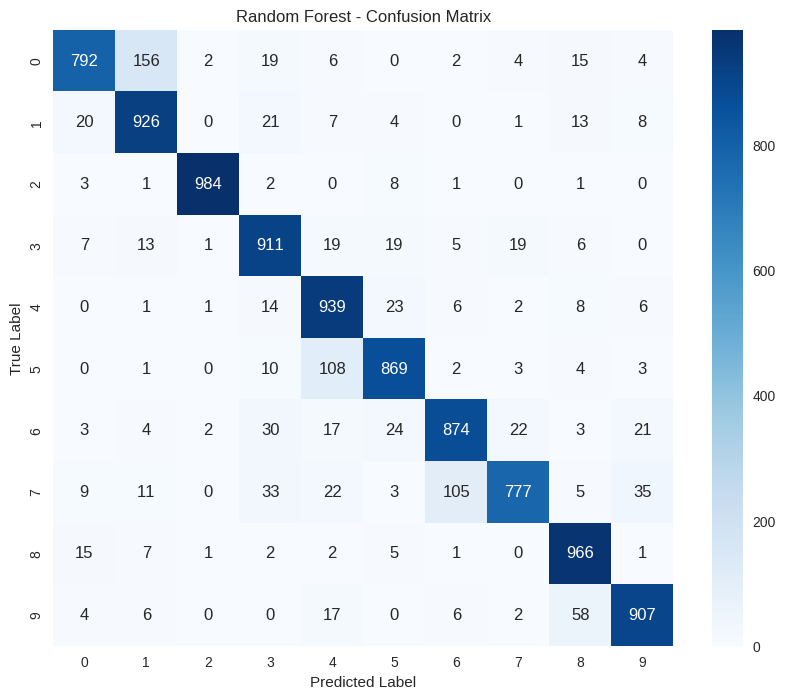

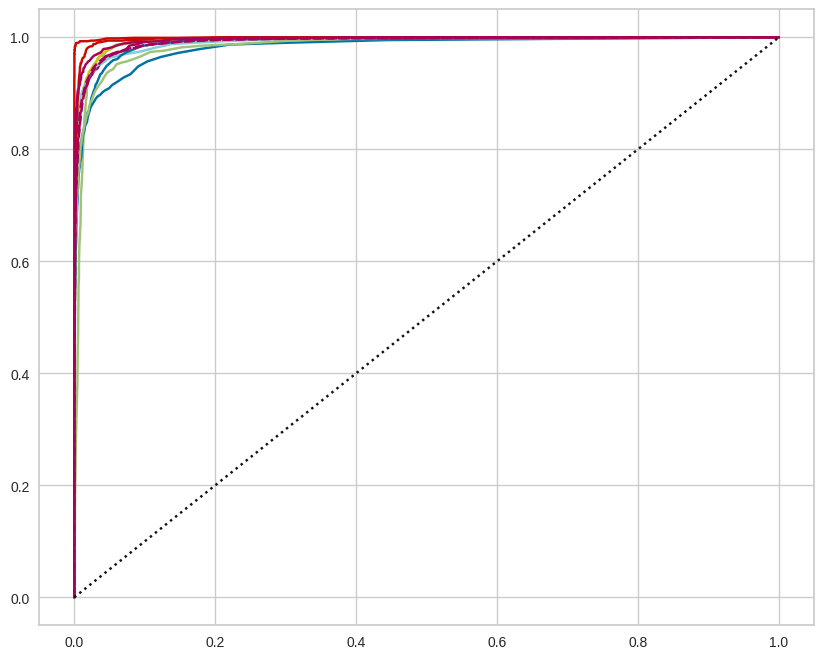

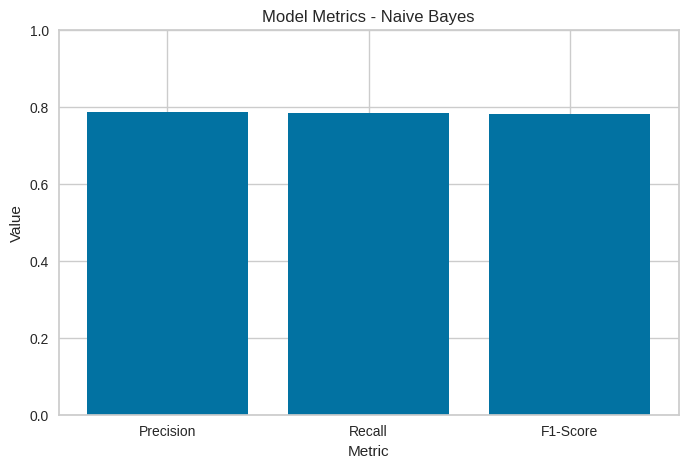

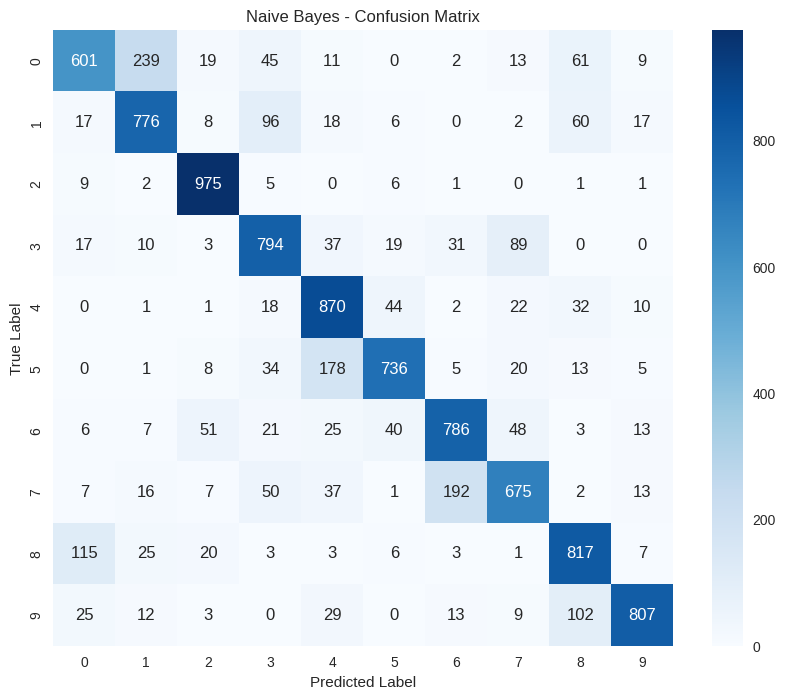

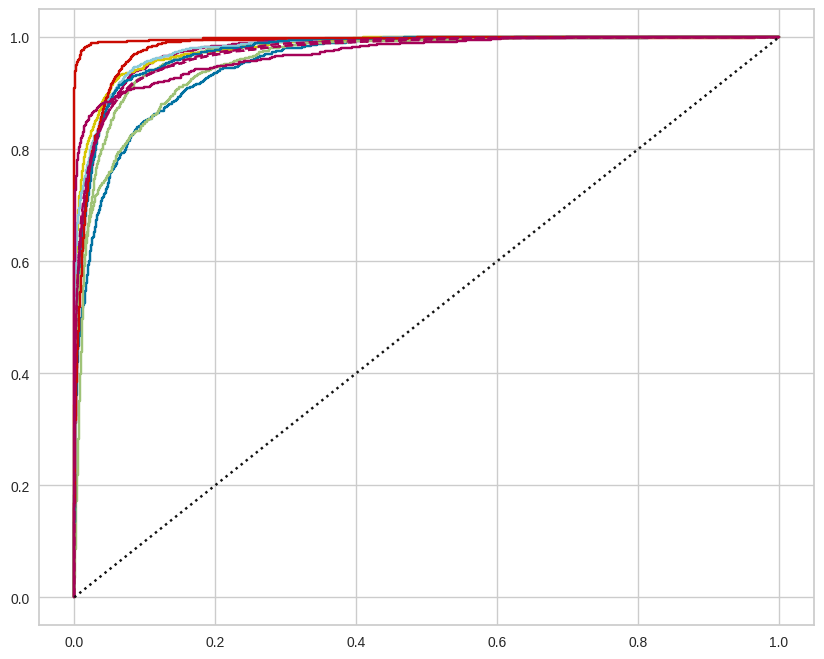

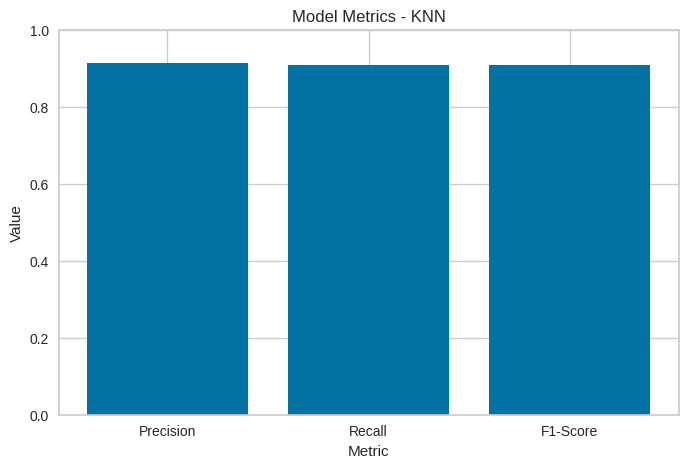

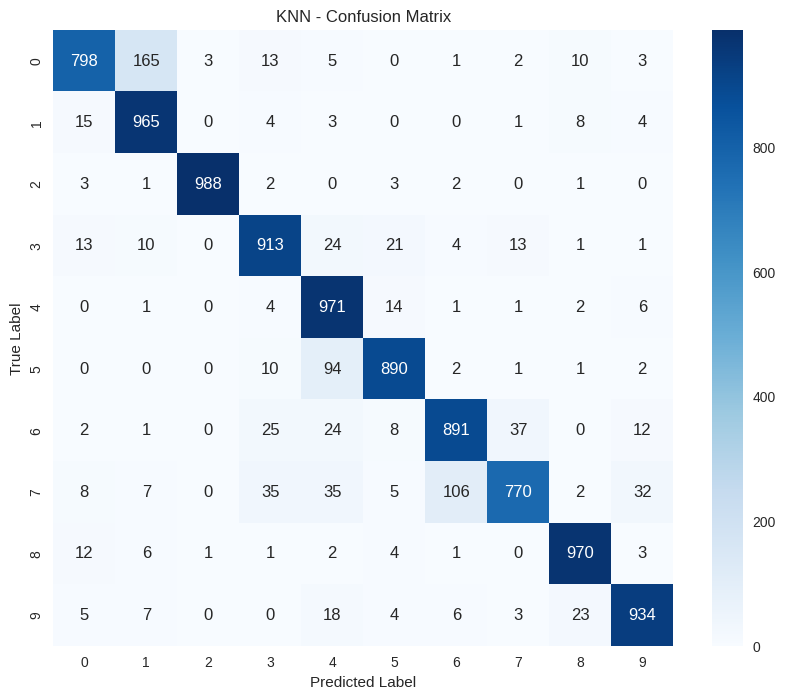

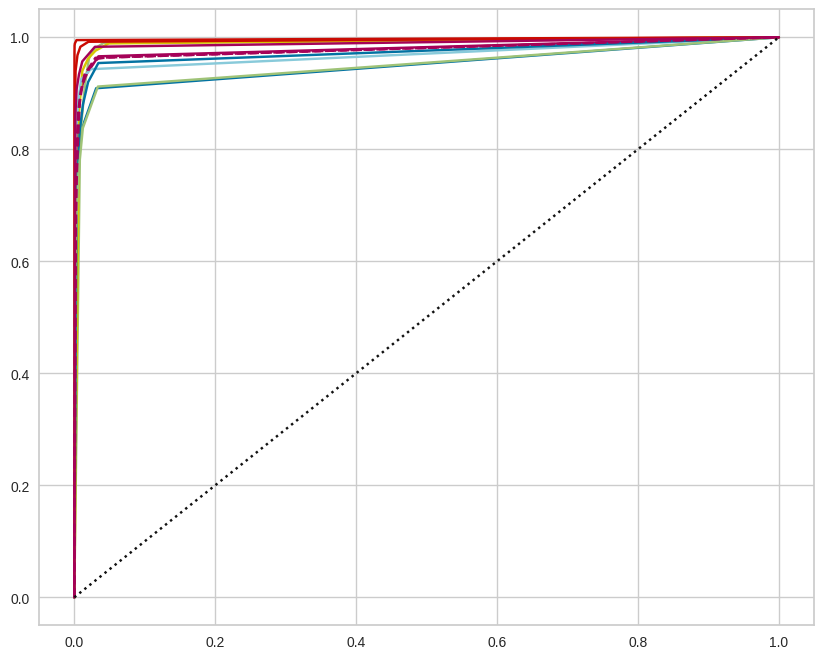

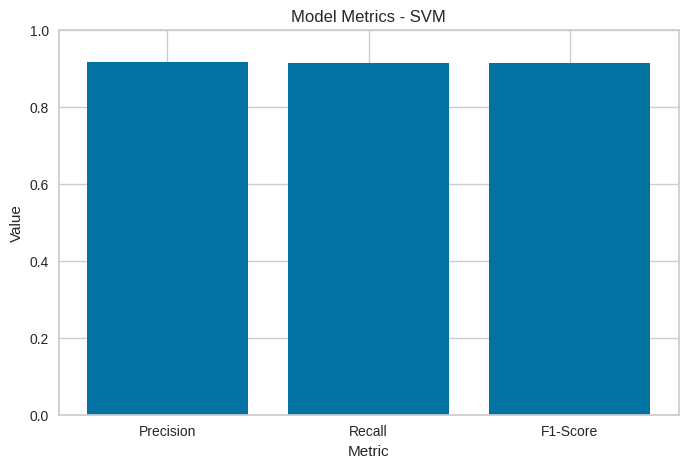

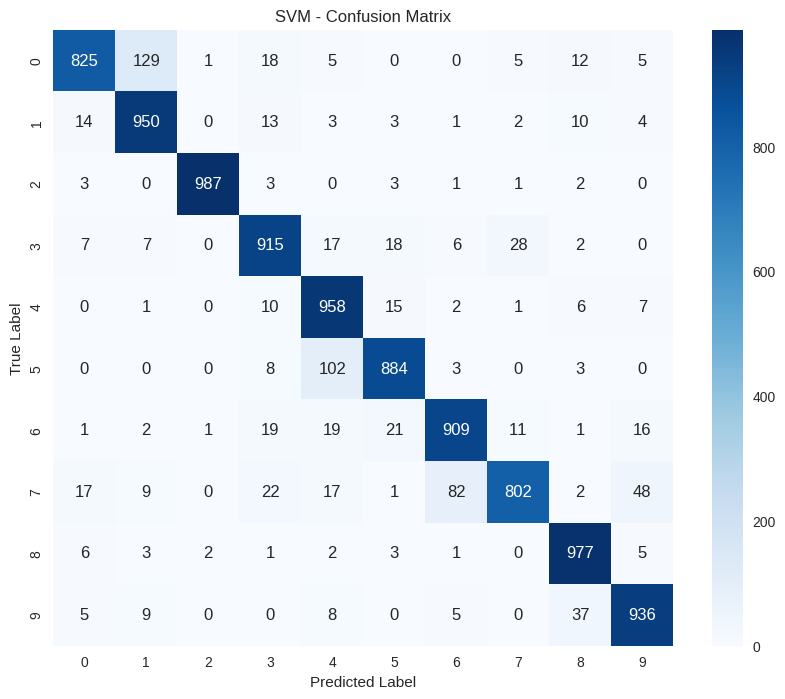

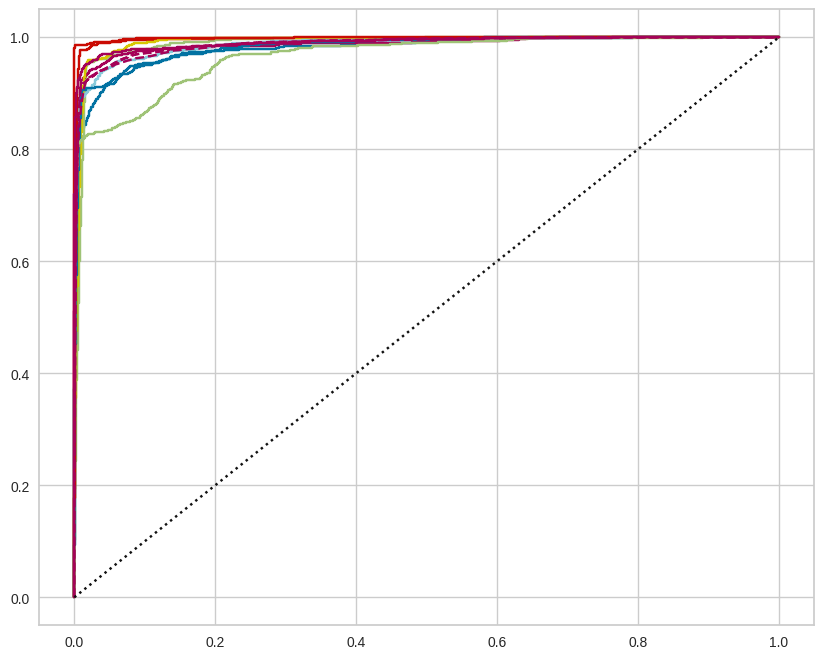

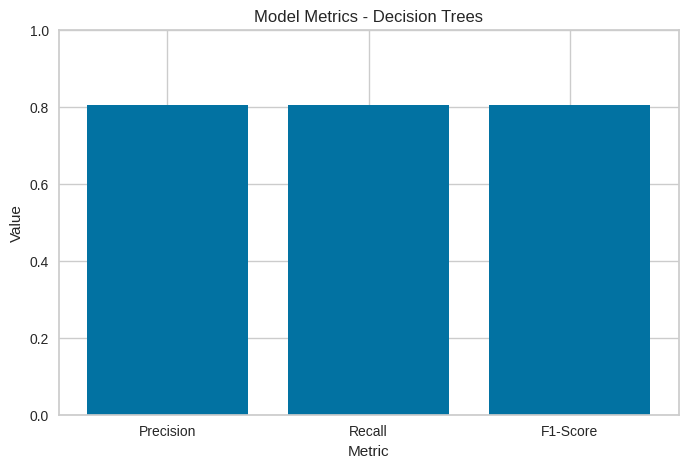

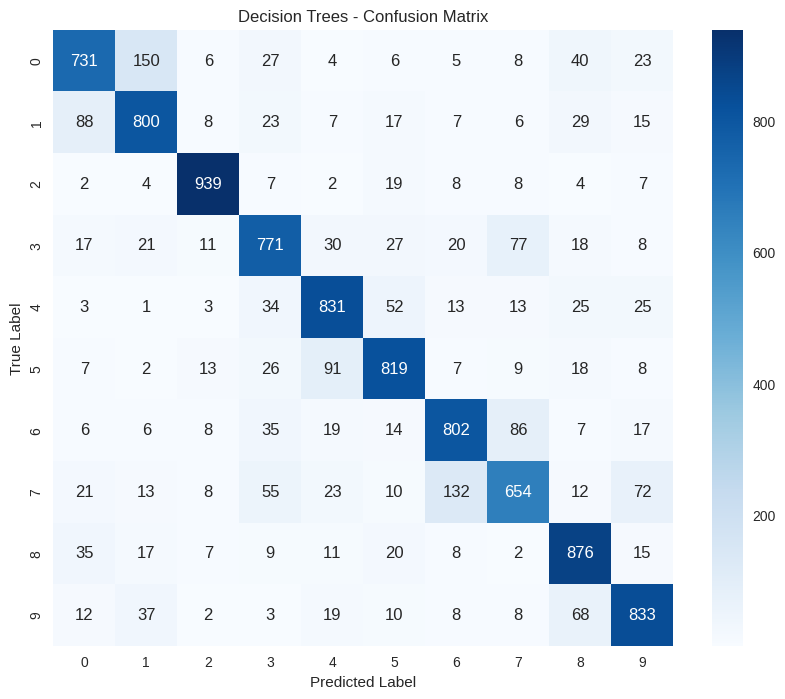

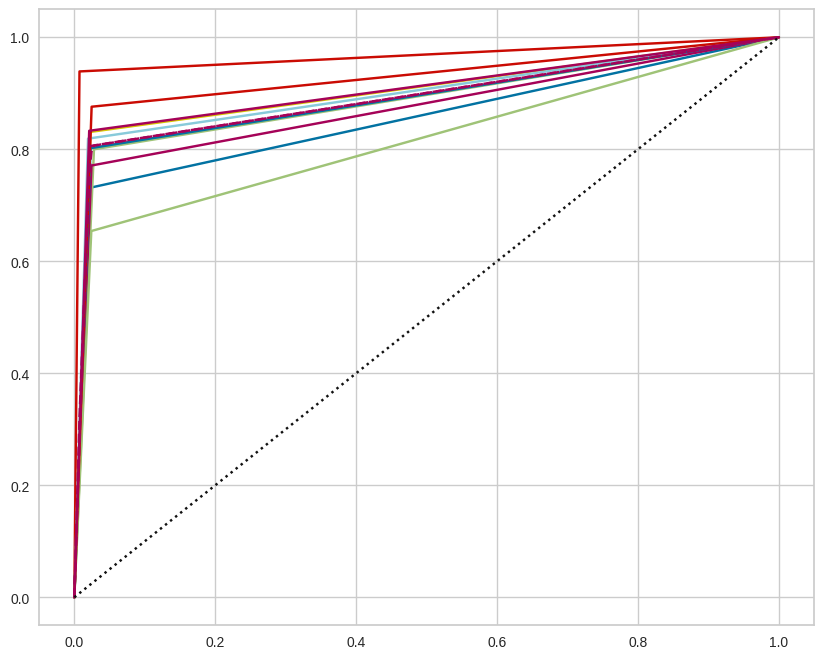

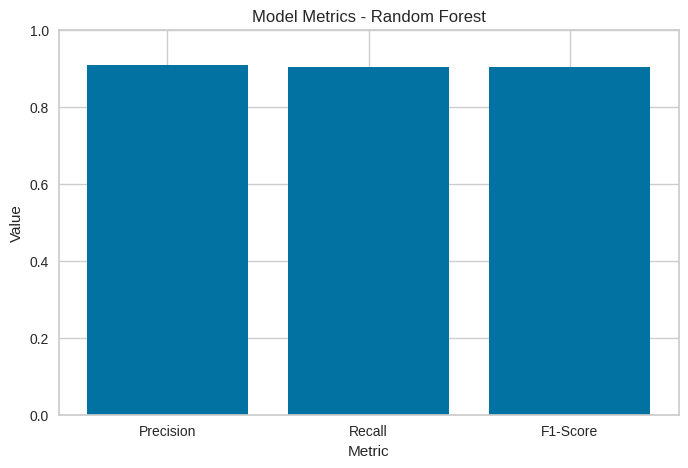

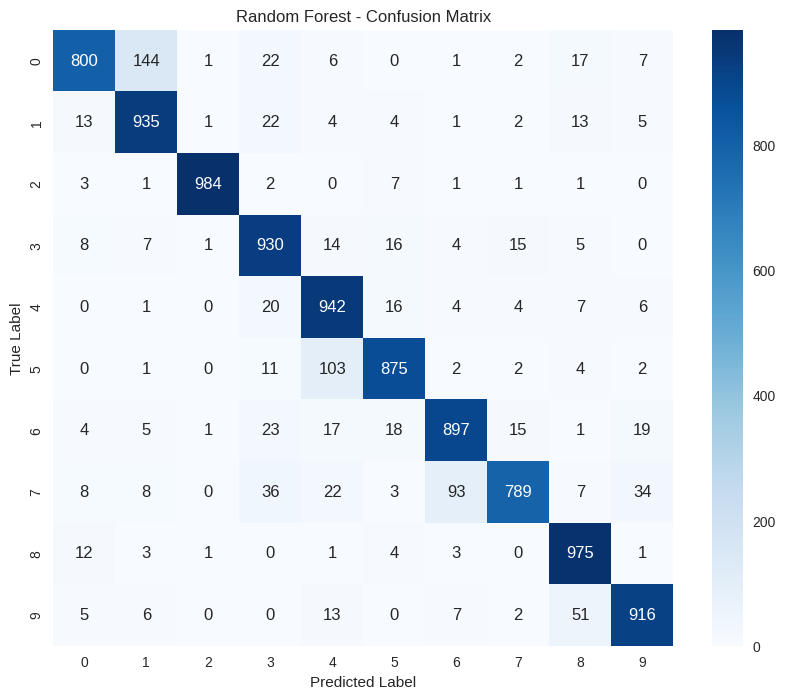

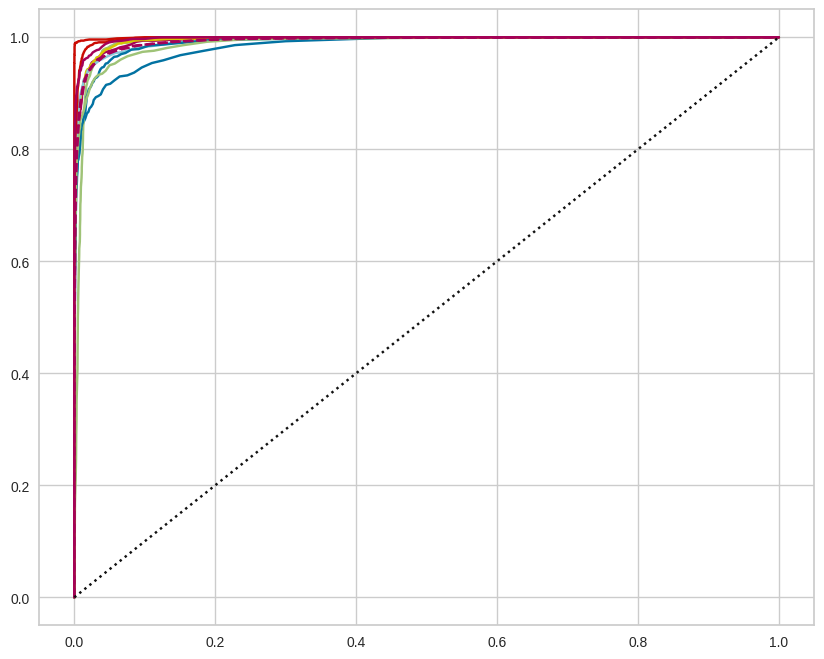

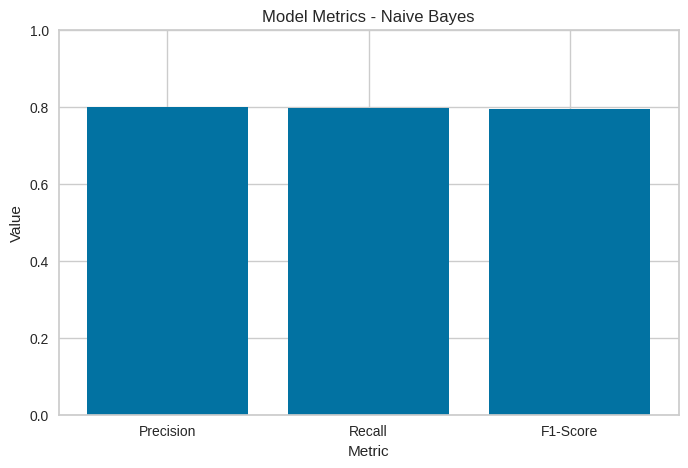

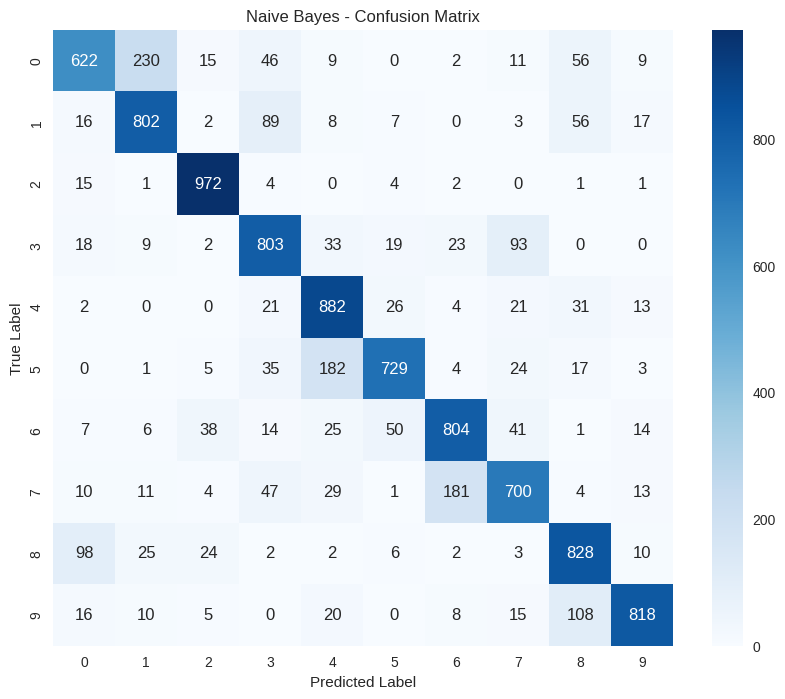

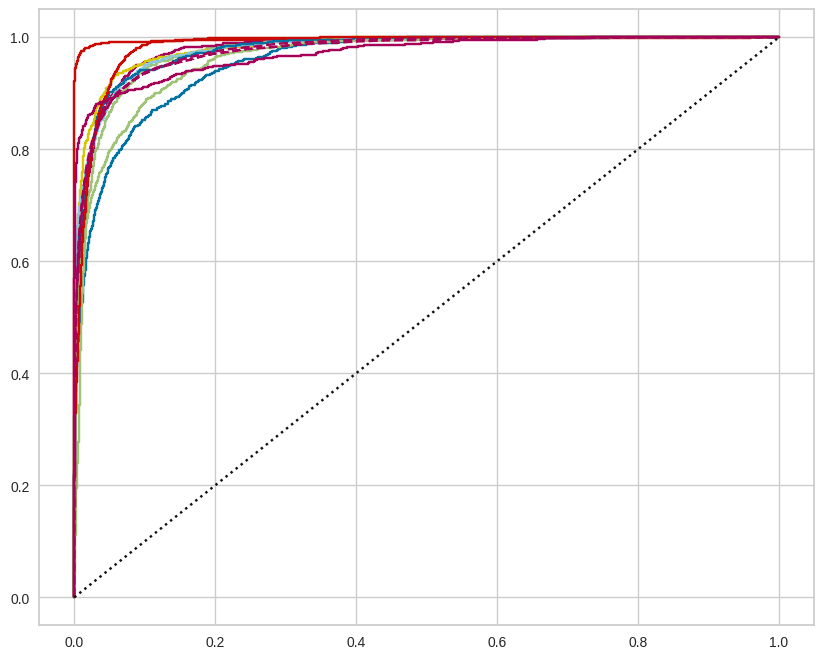

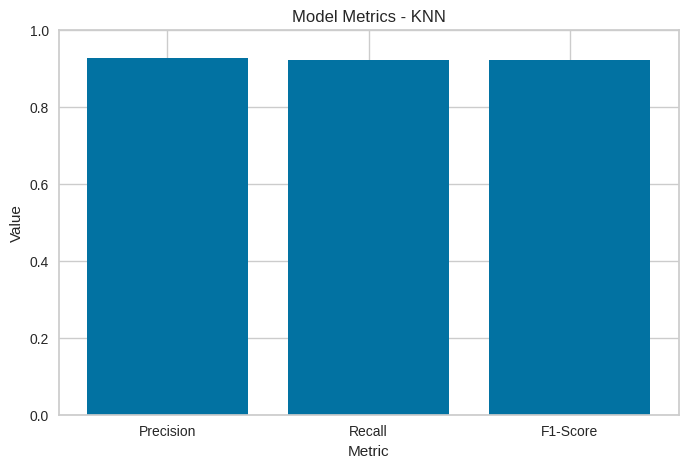

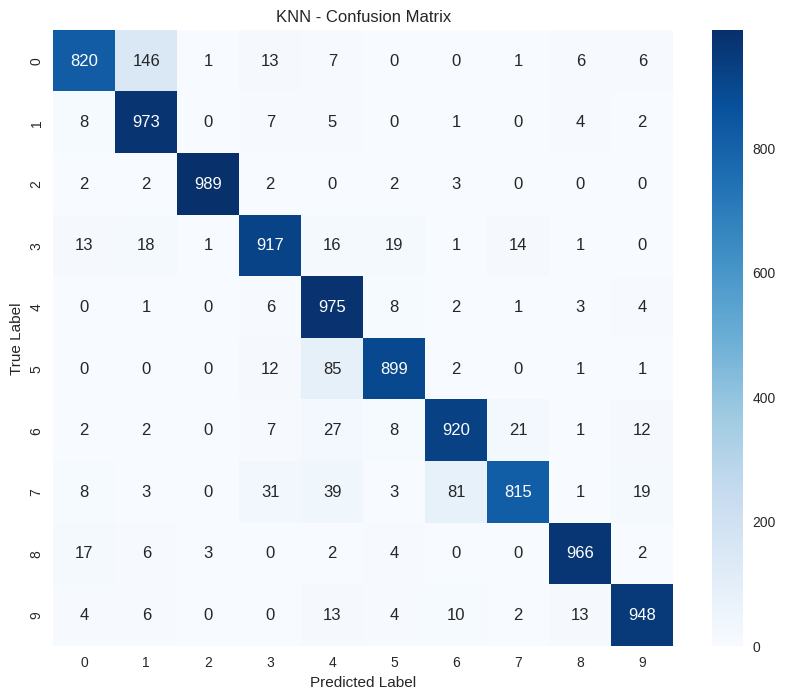

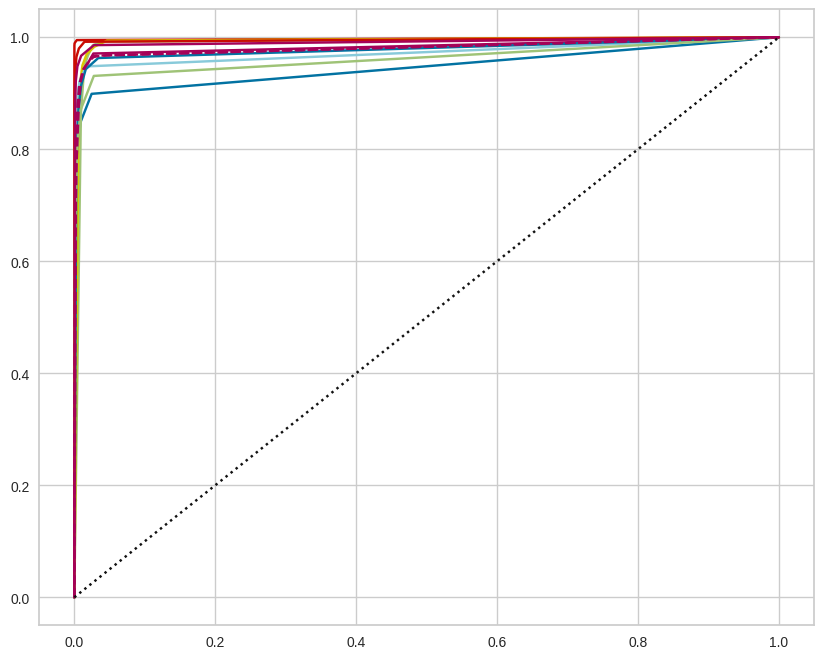

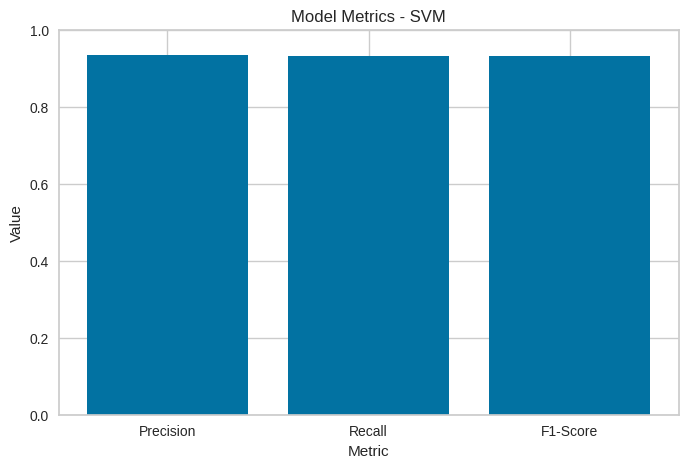

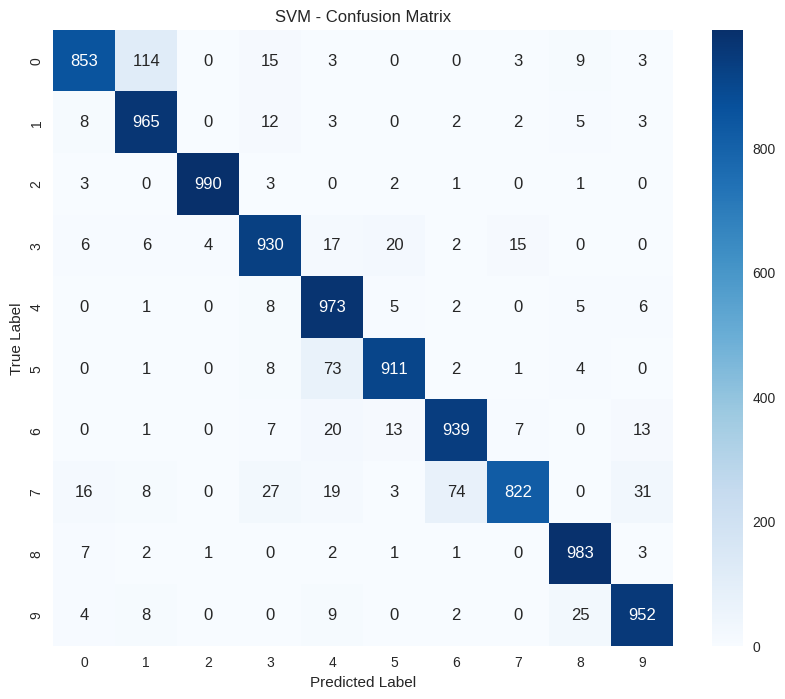

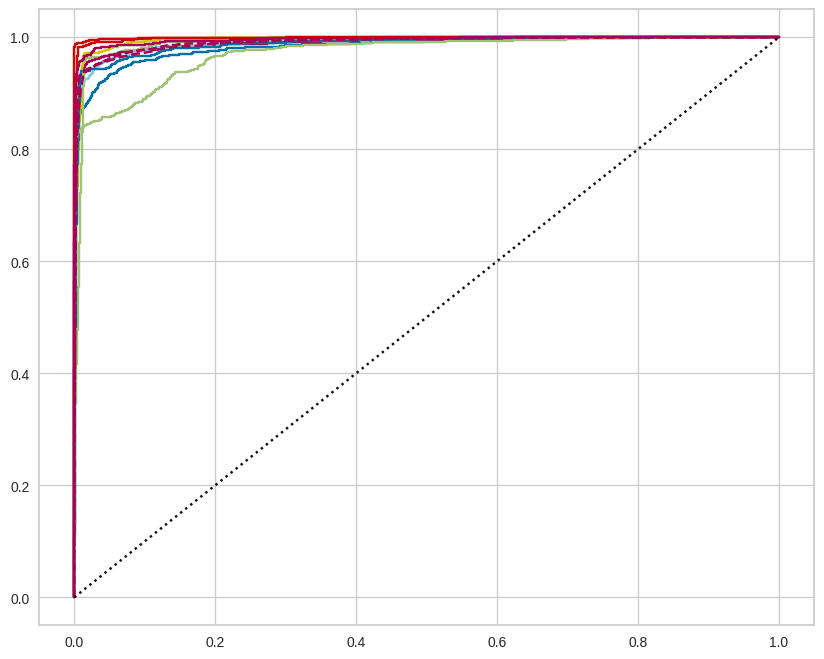

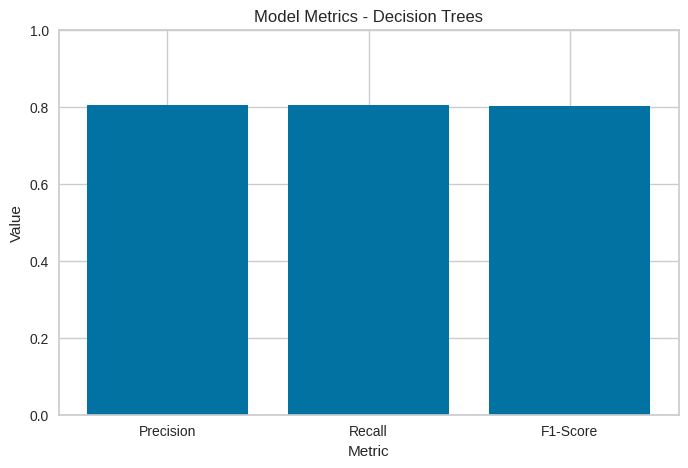

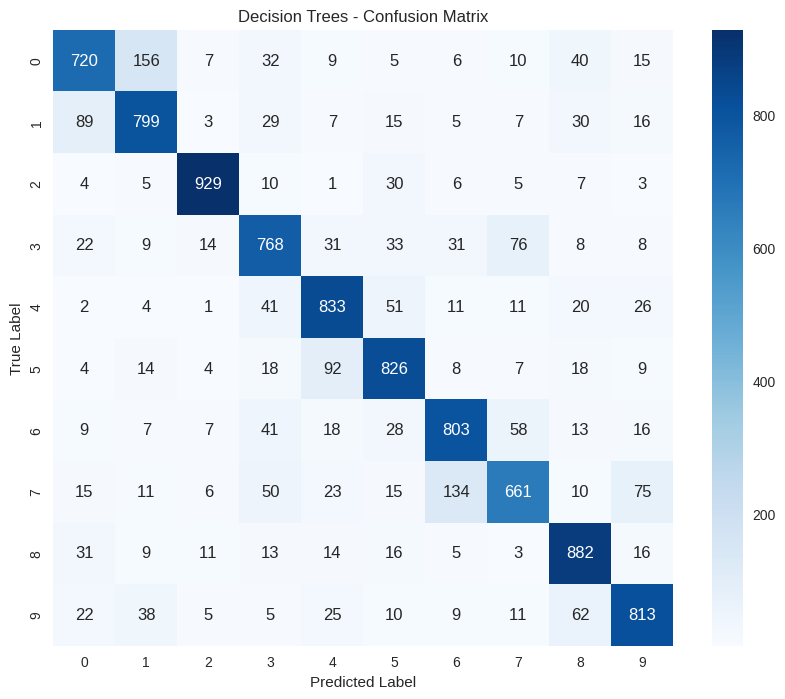

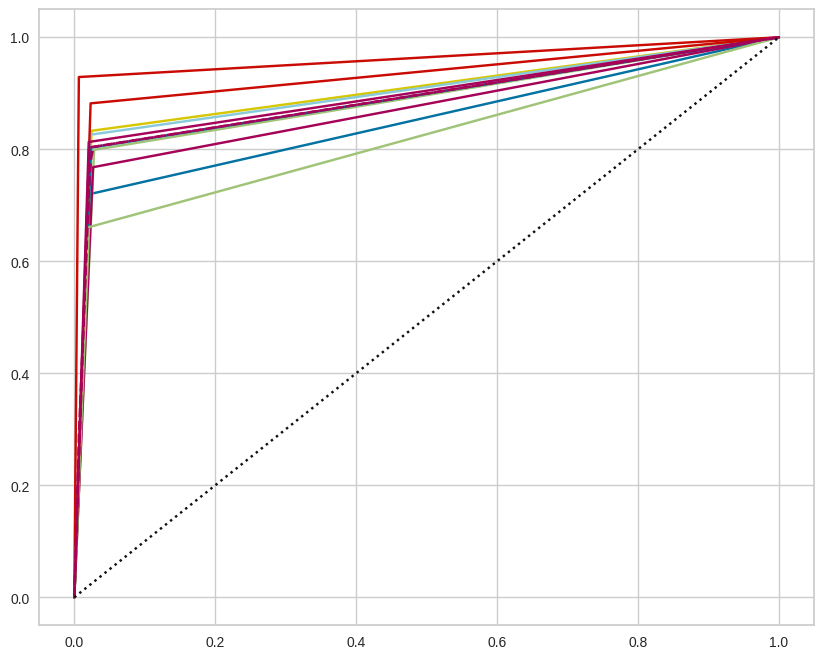

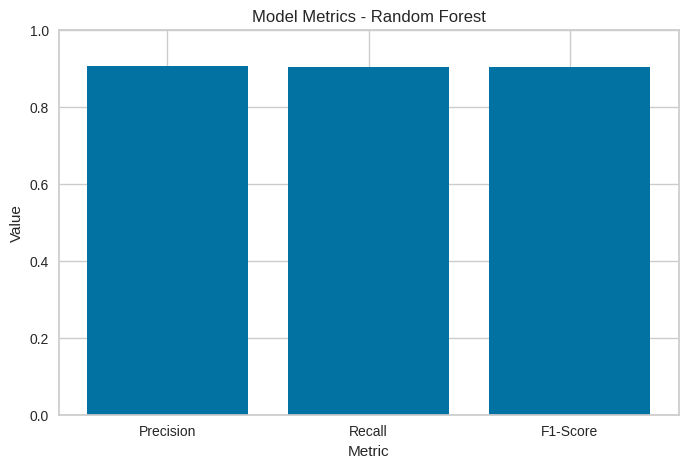

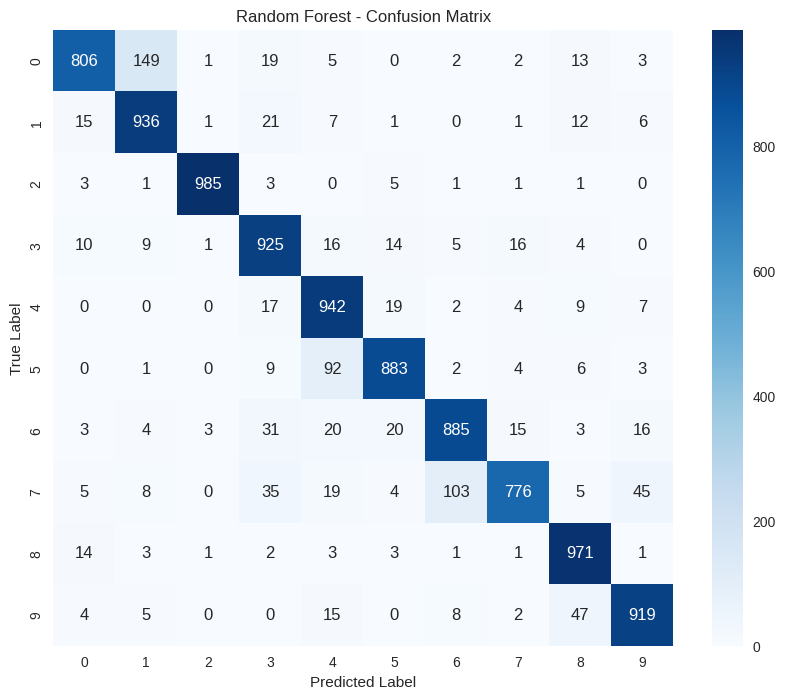

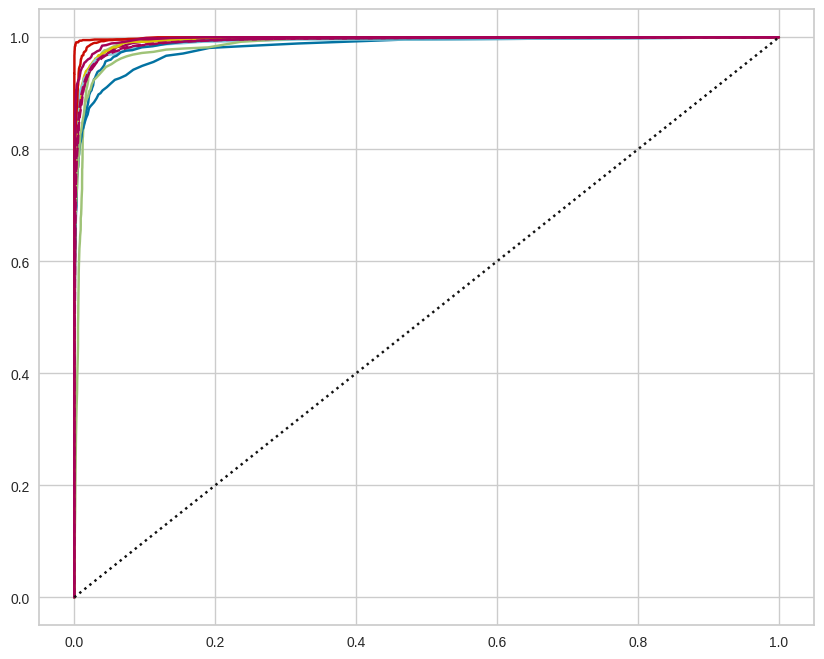

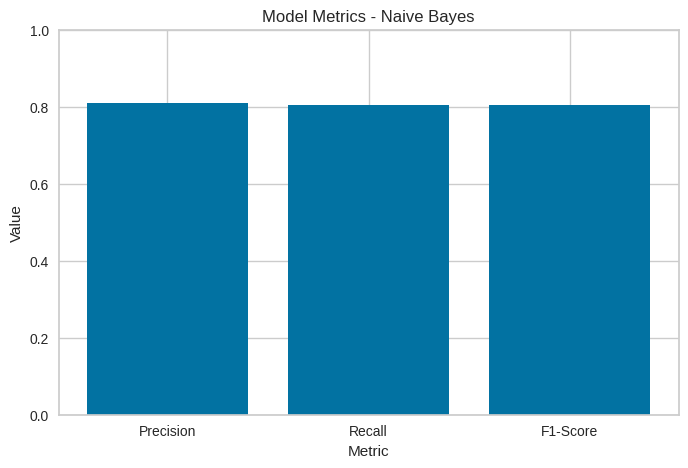

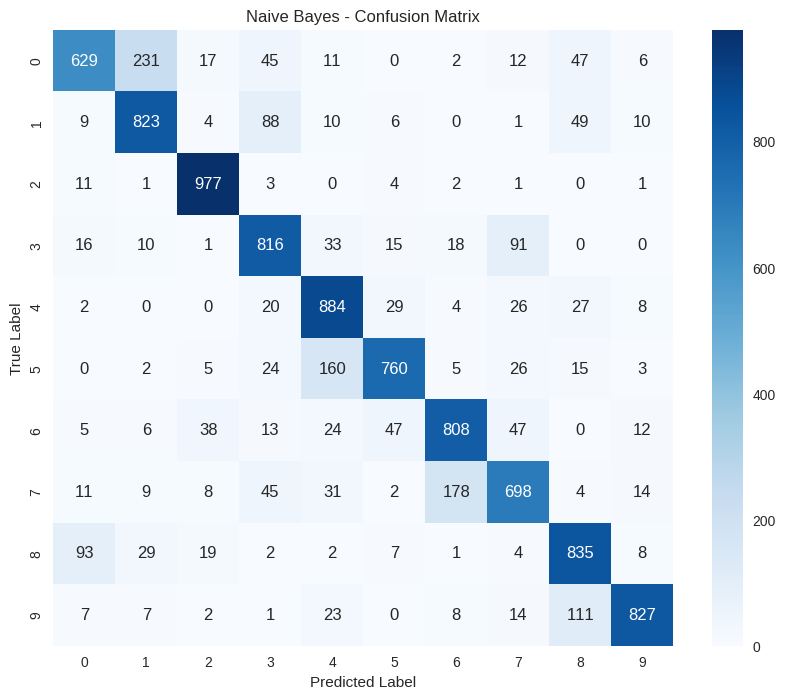

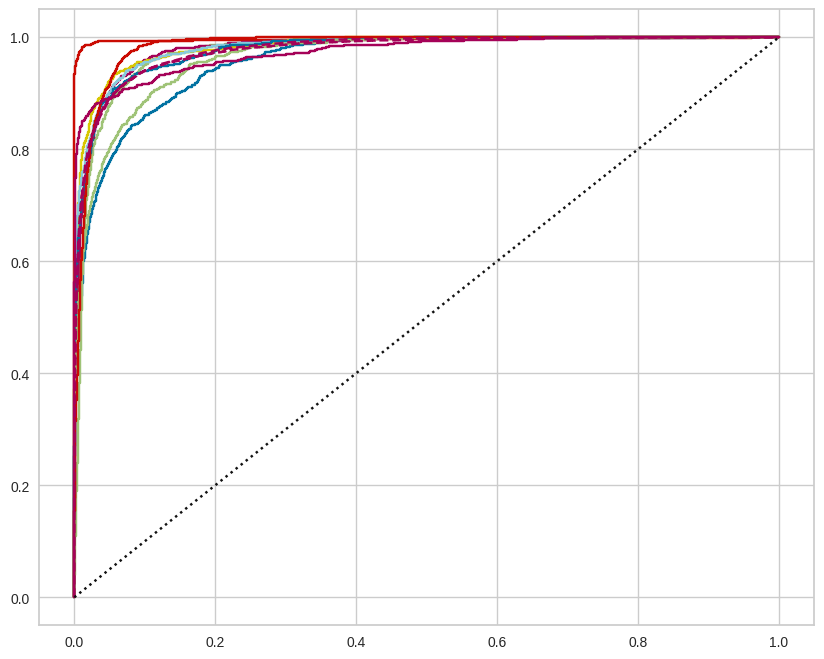

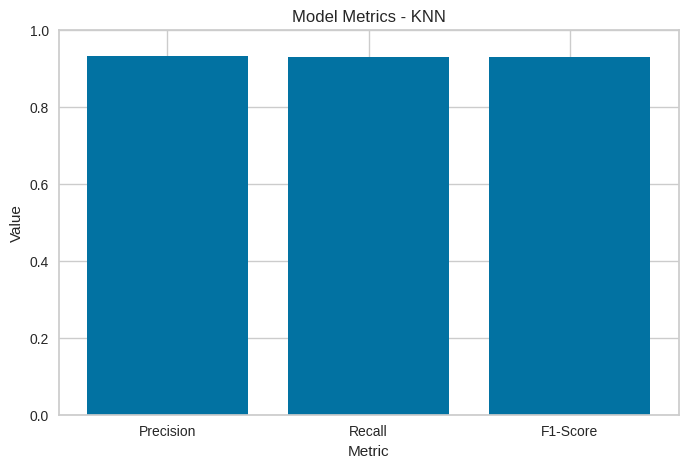

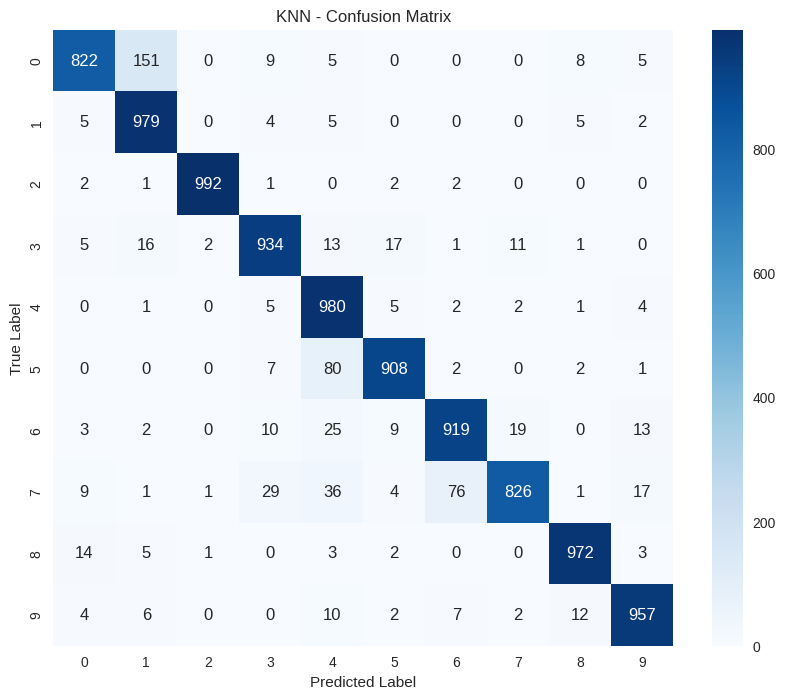

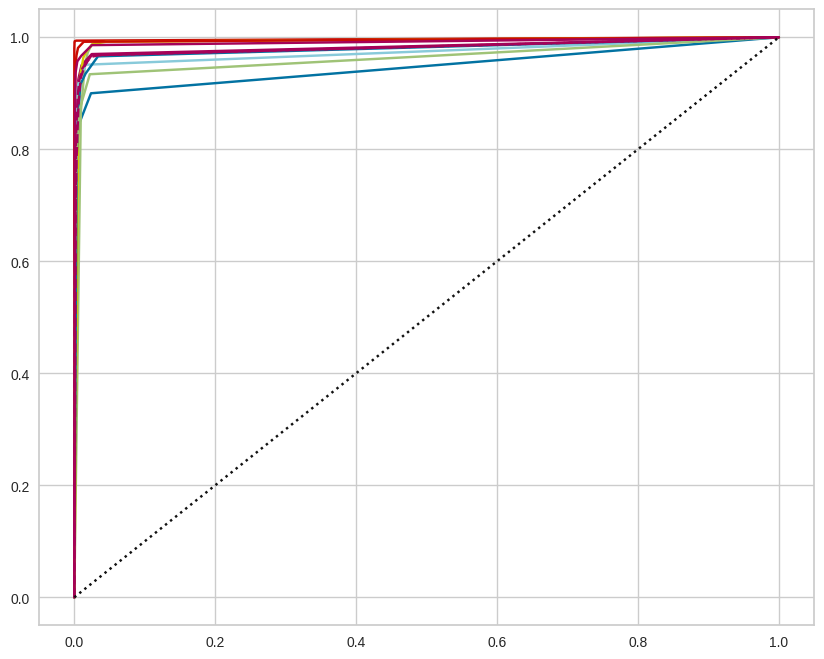

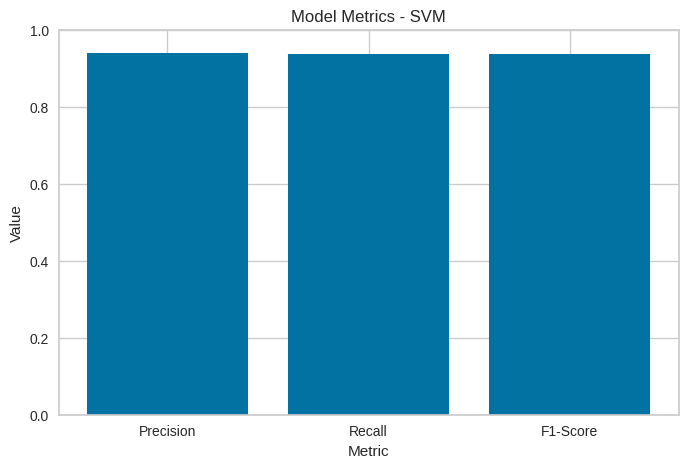

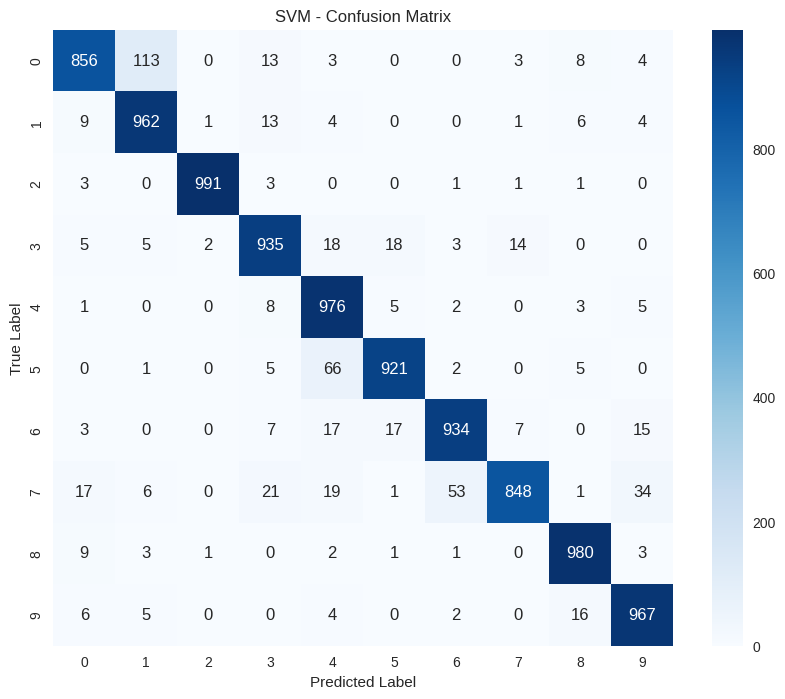

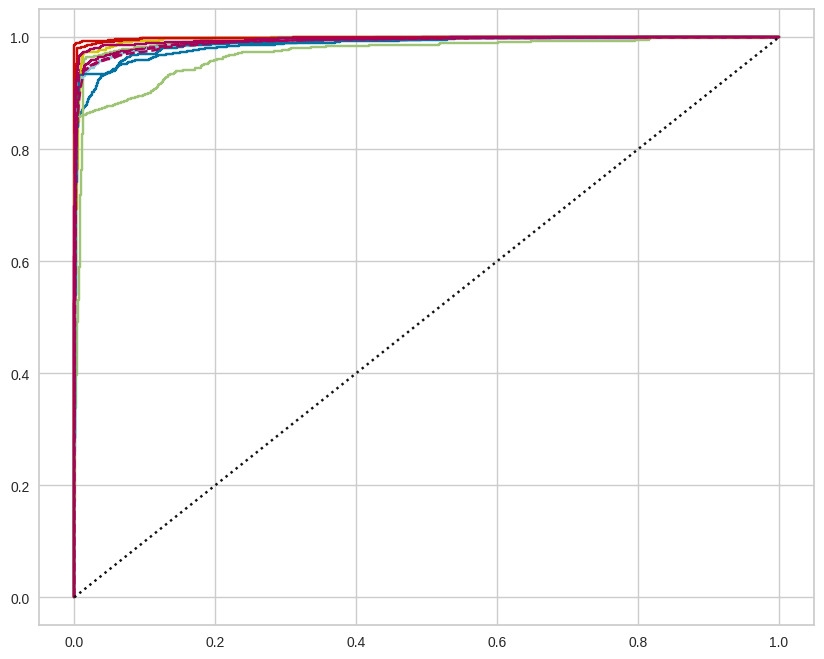

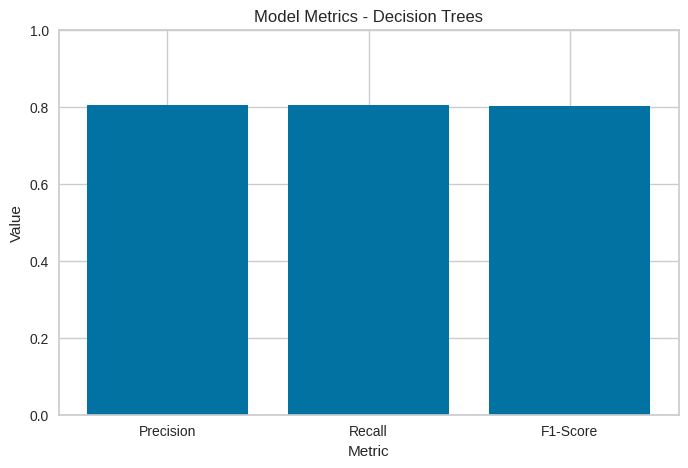

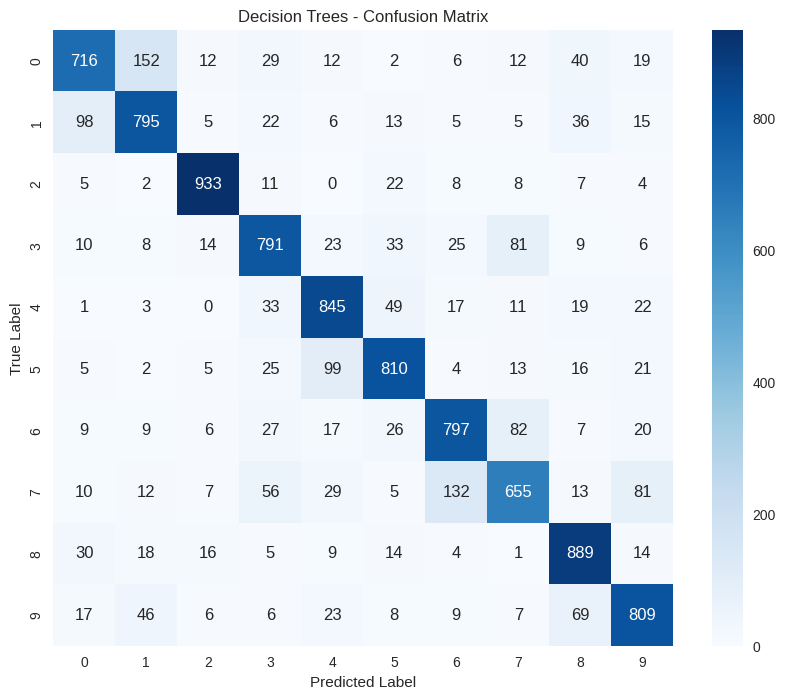

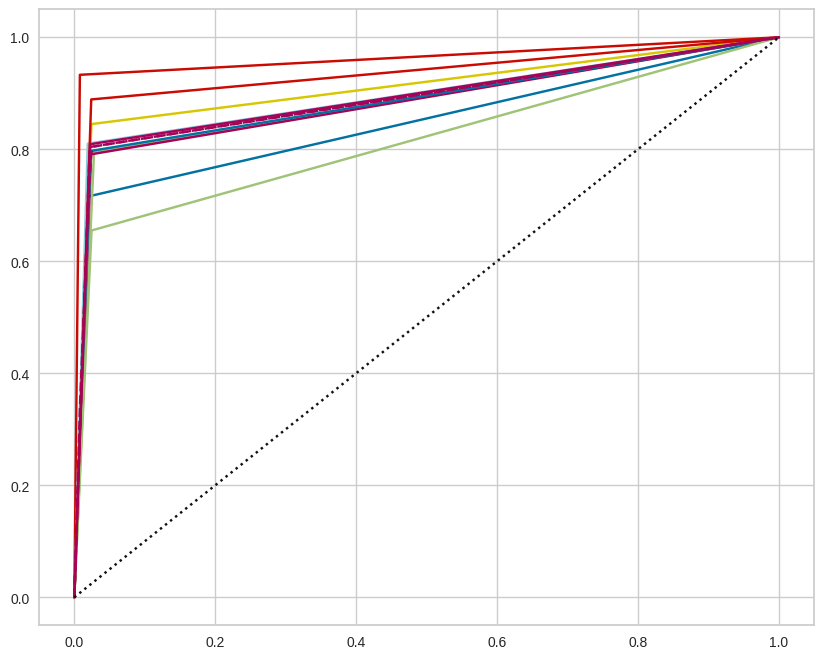

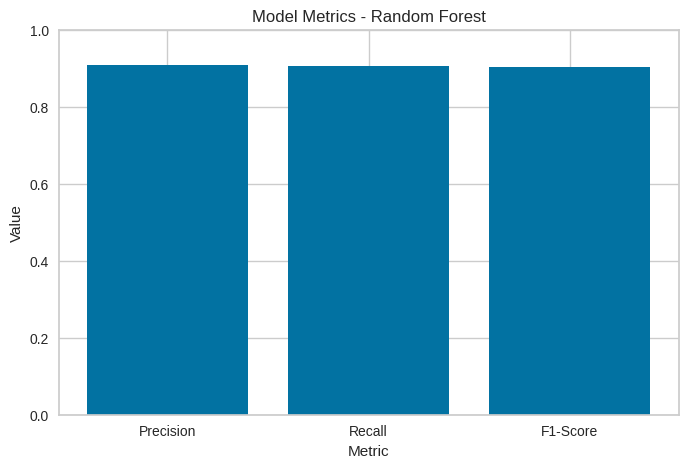

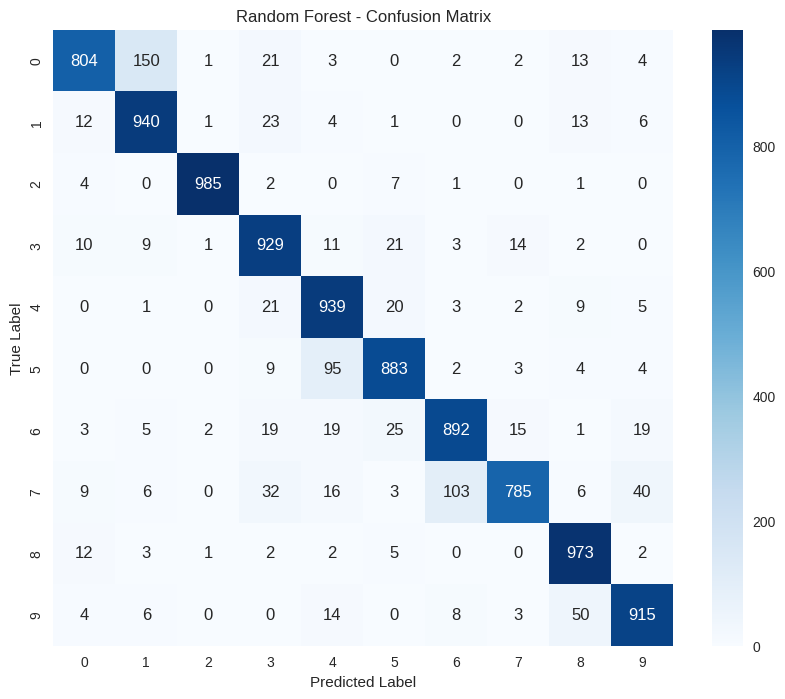

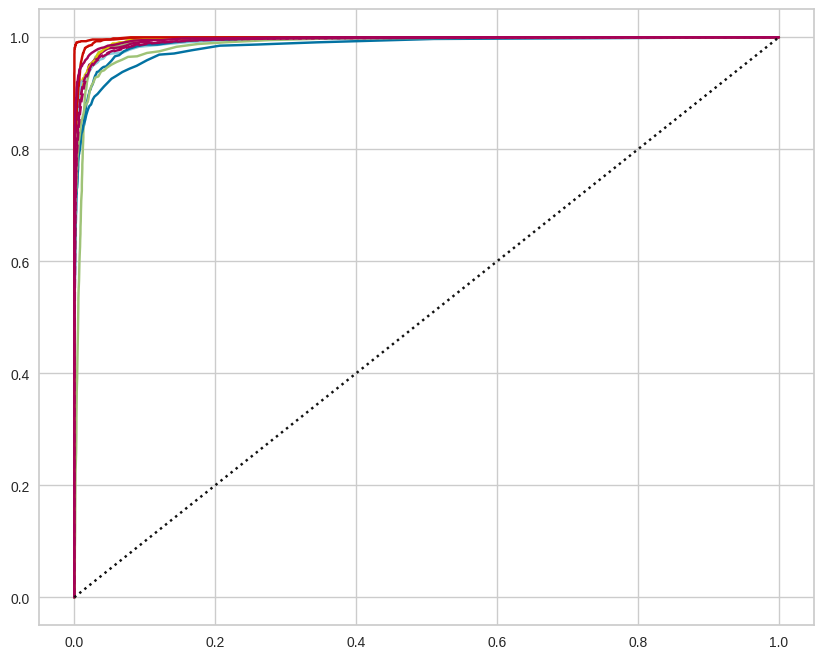

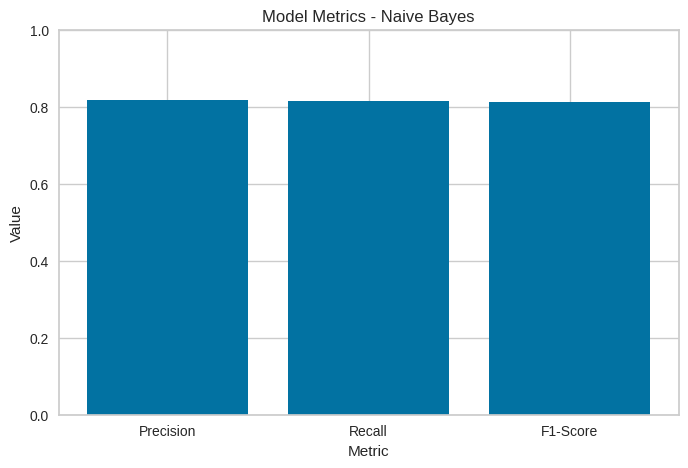

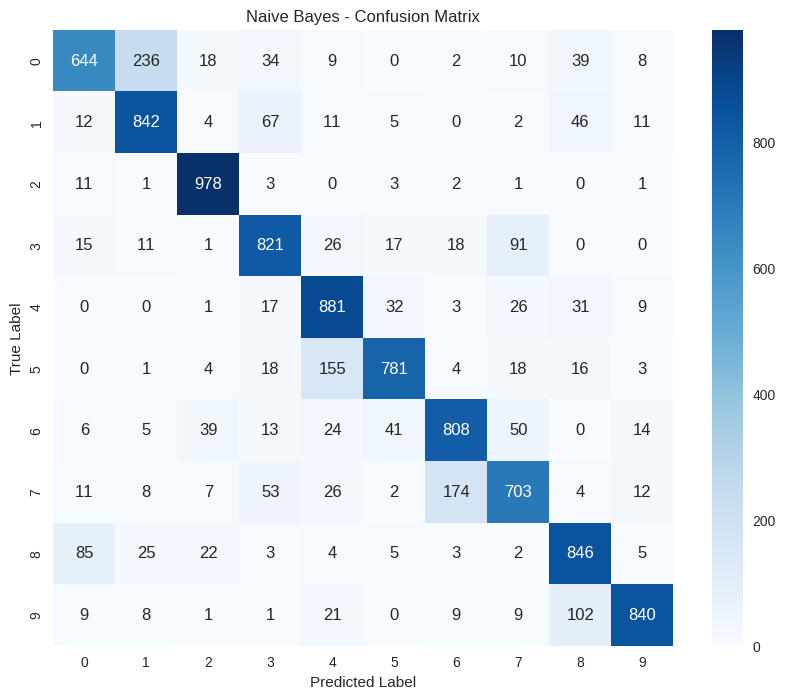

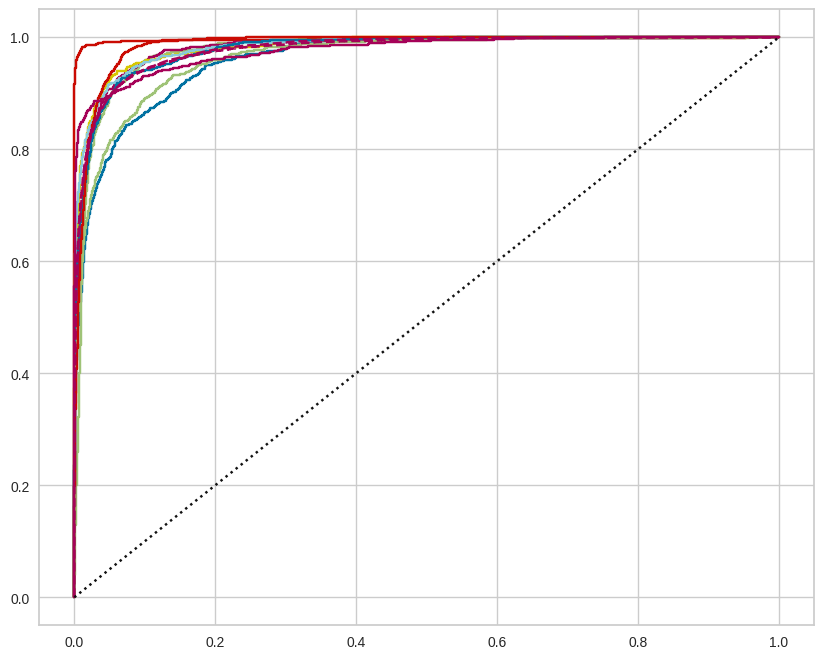

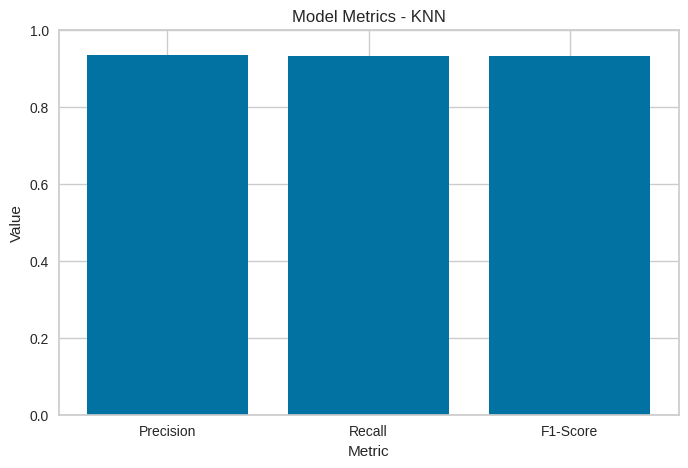

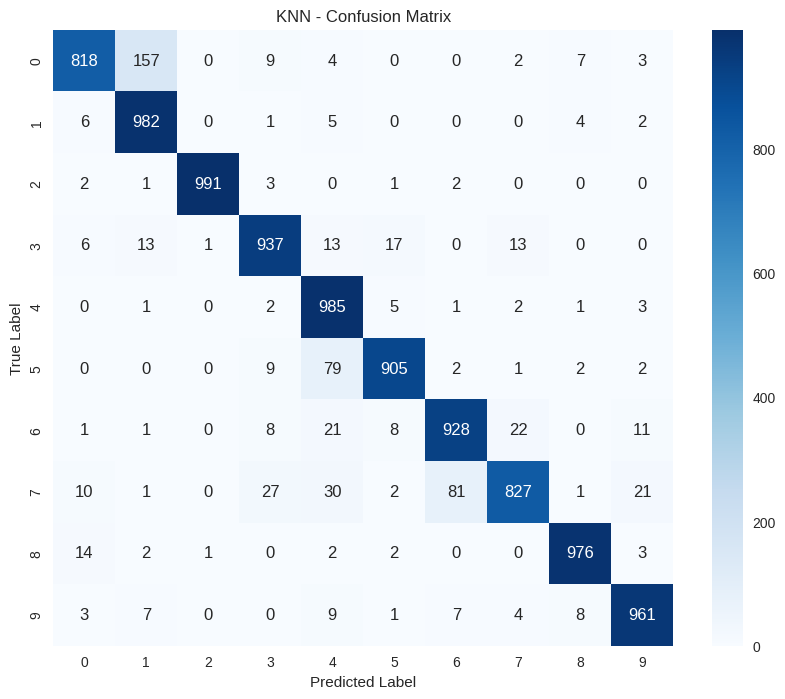

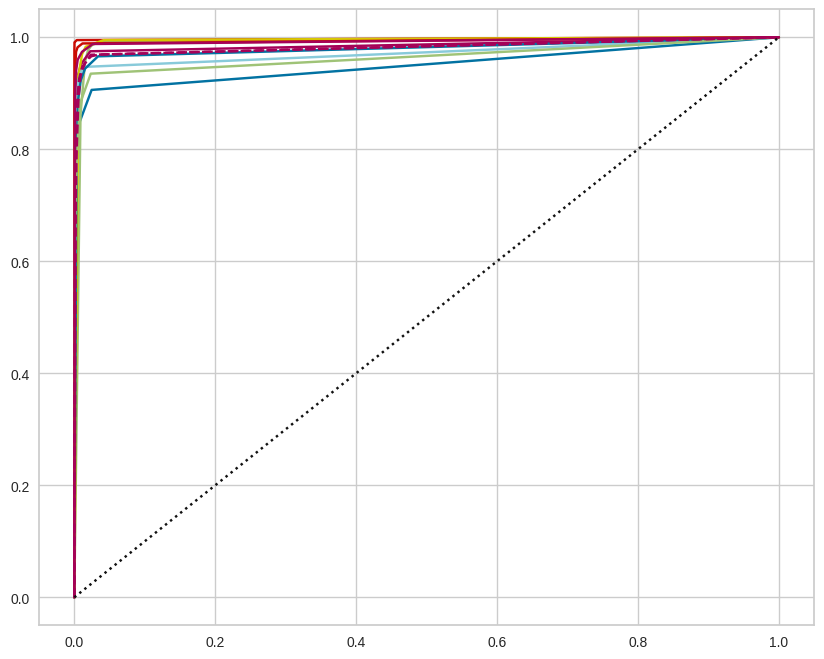

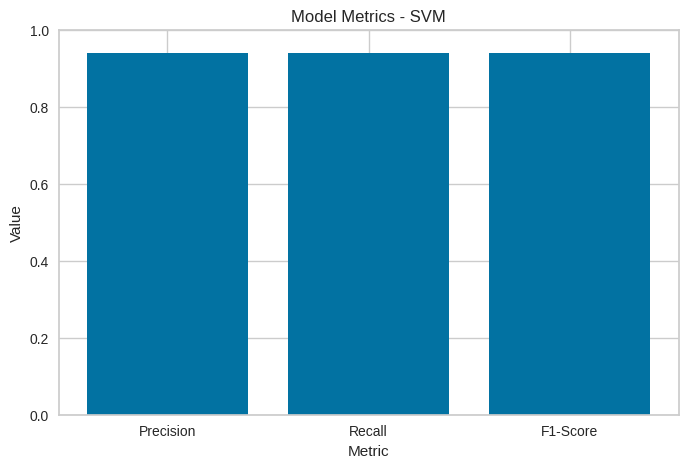

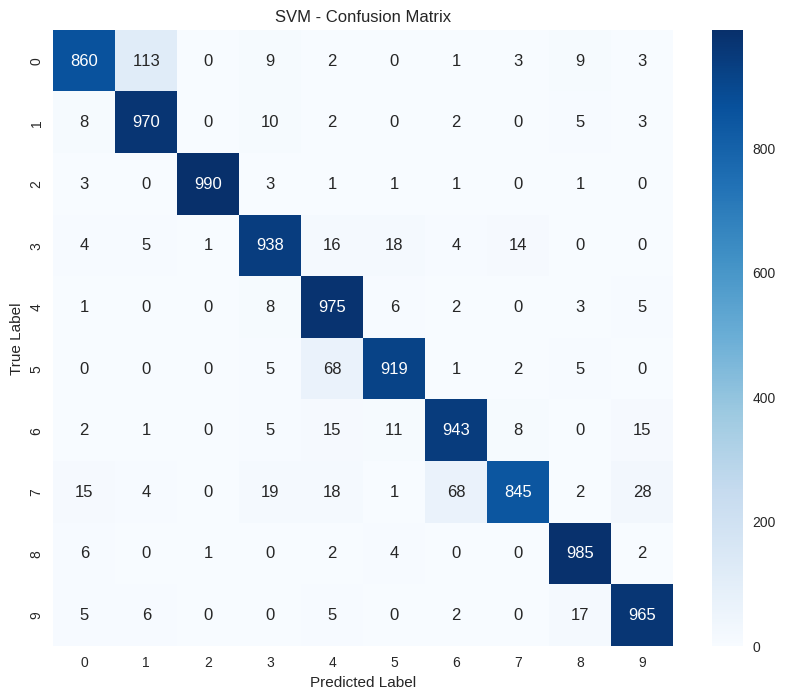

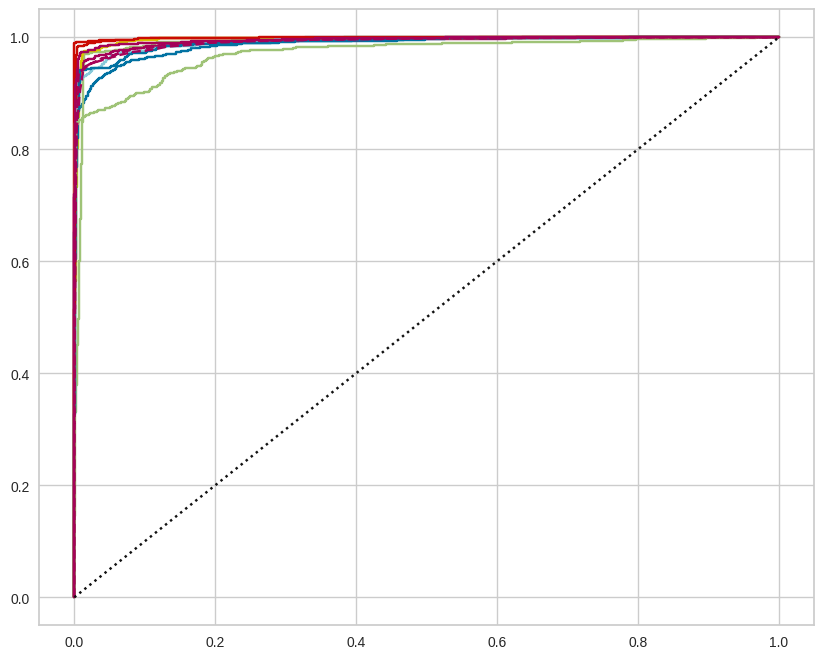

In [16]:
model_names = ['Decision Trees', 'Random Forest', 'Naive Bayes', 'KNN', 'SVM']
component_sizes = [10, 15, 20, 25, 30]
ds_dir = "Kannada_MNIST"

X_train = np.load(os.path.join(ds_dir,'/content/X_kannada_MNIST_train.npz'))['arr_0']
X_test = np.load(os.path.join(ds_dir,'/content/X_kannada_MNIST_test.npz'))['arr_0']
y_train = np.load(os.path.join(ds_dir,'/content/y_kannada_MNIST_train.npz'))['arr_0']
y_test = np.load(os.path.join(ds_dir,'/content/y_kannada_MNIST_test.npz'))['arr_0']
precisions = {model: [] for model in model_names}
recalls = {model: [] for model in model_names}
f1_scores = {model: [] for model in model_names}

def get_classifier(model):
    if model == 'Decision Trees':
        return DecisionTreeClassifier()
    elif model == 'Random Forest':
        return RandomForestClassifier()
    elif model == 'Naive Bayes':
        return GaussianNB()
    elif model == 'KNN':
        return KNeighborsClassifier()
    elif model == 'SVM':
        return SVC()

def calculate_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    return precision, recall, f1

for size in component_sizes:
    pdf_files = []

    # Flatten the images
    X_train_flatten = X_train.reshape(X_train.shape[0], -1)
    X_test_flatten = X_test.reshape(X_test.shape[0], -1)

    # Perform PCA
    pca = PCA(n_components=size)
    X_train_pca = pca.fit_transform(X_train_flatten)
    X_test_pca = pca.transform(X_test_flatten)

    # Train and evaluate models
    for model in model_names:
        classifier = get_classifier(model)
        classifier.fit(X_train_pca, y_train)
        y_pred = classifier.predict(X_test_pca)

        # Calculate metrics
        precision, recall, f1 = calculate_metrics(y_test, y_pred)

        # Store metrics
        precisions[model].append(precision)
        recalls[model].append(recall)
        f1_scores[model].append(f1)

        # Generate metrics bar chart
        plt.figure(figsize=(8, 5))
        plt.bar(['Precision', 'Recall', 'F1-Score'], [precision, recall, f1])
        plt.ylim(0, 1)
        plt.title(f'Model Metrics - {model}')
        plt.xlabel('Metric')
        plt.ylabel('Value')


        # Generate confusion matrix heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
        plt.title(f'{model} - Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')


        # Generate ROC-AUC curve using Yellowbrick
        plt.figure(figsize=(10, 8))
        visualizer = ROCAUC(classifier, classes=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
        visualizer.fit(X_train_pca, y_train)
        visualizer.score(X_test_pca, y_test)


    # Create model comparison table
    model_list = []
    precision_list = []
    recall_list = []
    f1_list = []

    for model in model_names:
        model_list.append(model)
        precision_list.append(precisions[model][-1])
        recall_list.append(recalls[model][-1])
        f1_list.append(f1_scores[model][-1])


    metrics_df = pd.DataFrame({
        'Model': model_list,
        'Precision': precision_list,
        'Recall': recall_list,
        'F1-Score': f1_list})
    print(metrics_df)

In [ ]:
                       ****************************Conclusion*****************************88
Based on the analysis and performance metrics of various classification models on the Kannada MNIST dataset, the following conclusions can be drawn:

                                               Model Comparison:

1- SVM (Support Vector Machine) consistently performed the best across different PCA component sizes with the highest precision, recall, and F1-score.
It achieved a precision of 0.9407, recall of 0.9390, and F1-score of 0.9387 when using 30 PCA components.

    
2- KNN (K-Nearest Neighbors) also showed strong performance, particularly with higher PCA component sizes.
It achieved a precision of 0.9343, recall of 0.9310, and F1-score of 0.9307 with 30 PCA components.


3- Random Forest was another top-performing model, with precision, recall, and F1-score values slightly lower than SVM and KNN,
but still significantly high (e.g., precision of 0.9074, recall of 0.9045, and F1-score of 0.9039 with 30 PCA components).


4- Naive Bayes and Decision Trees generally had lower performance compared to the other models, with Naive Bayes being the least
effective overall in terms of the metrics.

    
                                                        Impact of PCA:

The performance of all models improved with an increasing number of PCA components, indicating that retaining more variance in the data helps improve classification accuracy.
Using PCA components effectively reduces the dimensionality of the dataset, which helps in speeding up the computation while still maintaining high classification performance.
Visualization and Metrics:

Confusion matrices and ROC curves were generated for each model, providing visual confirmation of the models' performance and highlighting where misclassifications occurred.
The bar charts of precision, recall, and F1-scores for each model helped in understanding the relative performance and robustness of the classifiers.
Summary:
SVM and KNN classifiers are recommended for classifying Kannada MNIST data due to their high precision, recall, and F1-scores.
Random Forest also performs well and can be considered as a strong alternative.
Increasing the number of PCA components generally leads to better model performance.
Naive Bayes and Decision Trees are less effective for this dataset and may not be the best choice for high-accuracy requirements.
This comprehensive analysis suggests focusing on SVM or KNN with appropriate dimensionality reduction (PCA) for optimal classification results on the Kannada MNIST dataset.